In [1]:
##################################
### Import the usual libraries ###
##################################

### Numpy
import numpy as np

### Astropy
import astropy

#Astropy FITS/Table handling
from astropy.io import fits, ascii
from astropy.table import Table, Column

#astropy coorindates/units
from astropy.coordinates import SkyCoord
import astropy.constants as const
import astropy.units as u

### Pandas
# import pandas as pd

### Matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18}) #make plots more readable
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from matplotlib.offsetbox import AnchoredText

# ### Yumi's RA/DEC ---> Magellanic Stream Coorindates
# import MagellanicStream as ms

# ### Functions used in this code
# import age_functions as afunc

## Stuff Writtten by A Really Cool Professor
import dlnpyutils as dlpu

###
import linearfitting as linfit
import geometry as geo

import mlefitting as mlefit
import olsfitting as olsfit
import utilities as util

### Other
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm_notebook

### Age of Universe
H0 = 74.03*(u.km/u.s)/u.Mpc
hertz = H0.to(u.km/u.s/u.pc).to(u.km/u.s/u.km)
tage = (1/hertz).to(u.yr)
ageU = tage.value

In [2]:
#######################
### Import SMC Data ###
#######################

#total number 1225
smc = fits.getdata('/Users/joshpovick/Desktop/Research/SMC_Gradients/smc_rgbmembers.r13-l33-58932beta.fits.gz') 

cln = np.where((smc['FE_H']>-9999.0)&(smc['AK_TARG']>-9999.0)&(smc['LOGG']>0.0)&
               (smc['FE_H_ERR']>-90.0)&(smc['C_FE']>-9999.0)&(smc['N_FE']>-9999.0))

#total number 990
smc = smc[cln]

elems = ['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','P_FE','S_FE','K_FE','CA_FE','TI_FE',
         'TIII_FE','V_FE','CR_FE','MN_FE','FE_H','CO_FE','NI_FE','CU_FE','GE_FE','RB_FE','CE_FE','ND_FE','YB_FE']

elems_err = ['M_H_ERR','C_FE_ERR','N_FE_ERR','O_FE_ERR','NA_FE_ERR','MG_FE_ERR','AL_FE_ERR','SI_FE_ERR',
             'P_FE_ERR','S_FE_ERR','K_FE_ERR','CA_FE_ERR','TI_FE_ERR','TIII_FE_ERR','V_FE_ERR','CR_FE_ERR',
             'MN_FE_ERR','FE_H_ERR','CO_FE_ERR','NI_FE_ERR','CU_FE_ERR','GE_FE_ERR','RB_FE_ERR','CE_FE_ERR',
             'ND_FE_ERR','YB_FE_ERR']

labs = ['[M/H]','[C/Fe]','[N/Fe]','[O/Fe]','[Na/Fe]','[Mg/Fe]','[Al/Fe]','[Si/Fe]','[P/Fe]','[S/Fe]','[K/Fe]',
        '[Ca/Fe]','[Ti/FE]','[Ti II/Fe]','[V/Fe]','[Cr/Fe]','[Mn/Fe]','[Fe/H]','[Co/Fe]','[Ni/Fe]','[Cu/Fe]',
        '[Ge/Fe]','[Rb/Fe]','[Ce/Fe]','[Nd/Fe]','[Yb/FE]']

In [3]:
def ang_dist(ra, dec, ra0, dec0):
    '''
    Calculate the angular distance from (ra0, dec0)
    
    Input:
    -----
        ra: object ra
        dec: object dec
        ra0: ra of ref point
        dec0: dec of ref point
    
    Output:
    -----
        rho: angular distance 
    '''
    rho = np.arccos(np.cos(dec)*np.cos(dec0)*np.cos(np.subtract(ra,ra0))+np.sin(dec)*np.sin(dec0))
    return rho


radius = smc['SMCRAD']*1.05
# radmod = ang_dist(smc['RA'],smc['DEC'],12.54,-73.11)

(array([ 66., 163., 156., 104.,  88., 107.,  90., 114.,  83.,  19.]),
 array([0.05985578, 0.36139108, 0.66292637, 0.96446167, 1.26599696,
        1.56753226, 1.86906755, 2.17060285, 2.47213814, 2.77367344,
        3.07520873]),
 <a list of 10 Patch objects>)

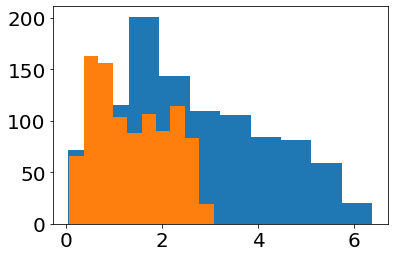

In [68]:
plt.hist(radius)
plt.hist(radmod)

In [69]:
smc.columns

ColDefs(
    name = 'APSTAR_ID'; format = '46A'
    name = 'TARGET_ID'; format = '36A'
    name = 'ASPCAP_ID'; format = '48A'
    name = 'FILE'; format = '34A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '6A'
    name = 'LOCATION_ID'; format = 'J'
    name = 'FIELD'; format = '5A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '45A'
    name = 'SURVEY'; format = '8A'
    name = 'PROGRAMNAME'; format = '10A'
    name 

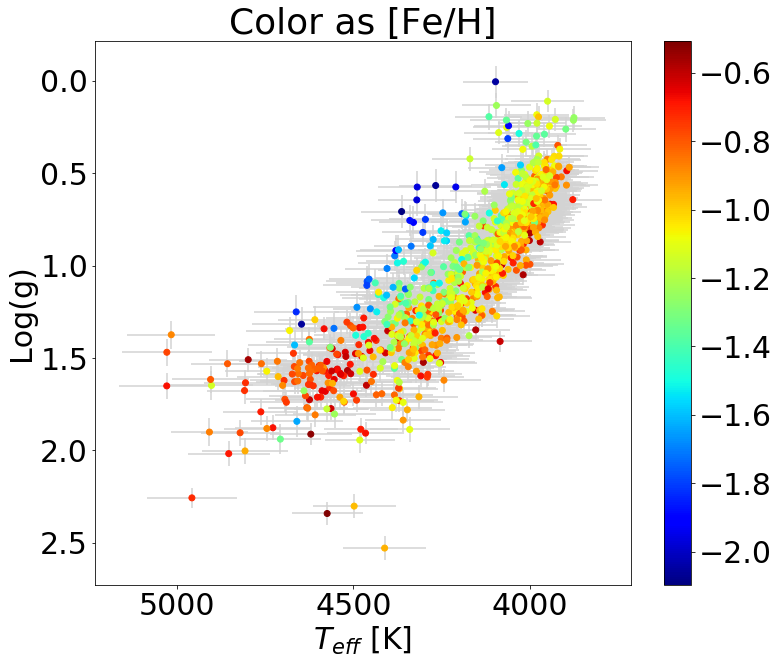

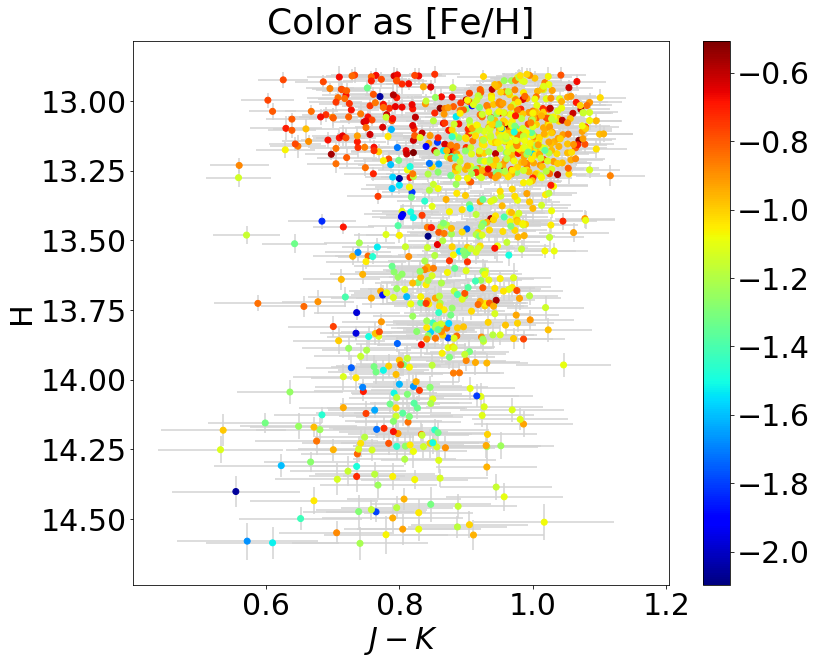

In [4]:
###############
### SMC CMD ###
###############

matplotlib.rcParams.update({'font.size': 30})

## CMD
plt.figure(figsize=[12,10])
plt.errorbar(smc['TEFF'],smc['LOGG'],xerr=smc['TEFF_ERR'],yerr=smc['LOGG_ERR'],c='lightgrey',zorder=1,ls='none')
plt.scatter(smc['TEFF'],smc['LOGG'],c=smc['FE_H'],cmap='jet',zorder=2)
plt.colorbar()

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.title(r'Color as [Fe/H]')
plt.xlabel(r'$T_{eff}$ [K]')
plt.ylabel(r'Log(g)')

plt.savefig('SMCCMD.pdf',bbox_inches='tight')
plt.show()

## HJKCMD
jk_err = np.sqrt((smc['J_ERR'])**2+(smc['K_ERR'])**2)
plt.figure(figsize=[12,10])
plt.errorbar(smc['J']-smc['K'],smc['H'],xerr=jk_err,yerr=smc['H_ERR'],c='lightgrey',zorder=1,ls='none')
plt.scatter(smc['J']-smc['K'],smc['H'],c=smc['FE_H'],cmap='jet',zorder=2)
plt.colorbar()

plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()

plt.title(r'Color as [Fe/H]')
plt.xlabel(r'$J - K$')
plt.ylabel(r'H')

plt.savefig('HJKSMCCMD.pdf',bbox_inches='tight')
plt.show()

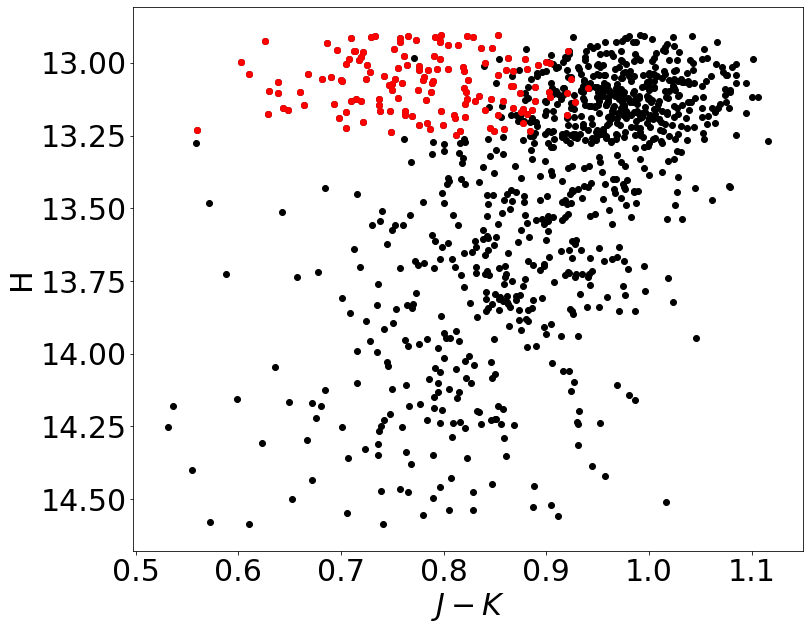

In [95]:
## Find Bloop
bloop = np.where((smc['H']<=13.25)&(smc['J']-smc['K']<=0.95)&(smc['TEFF']>=4175))
jk_err = np.sqrt((smc['J_ERR'])**2+(smc['K_ERR'])**2)
plt.figure(figsize=[12,10])
plt.scatter(smc['J']-smc['K'],smc['H'],c='k')
plt.scatter((smc['J']-smc['K'])[bloop],smc['H'][bloop],c='r')

bloop_cut = []
for i in range(len(smc)):
    if i not in np.squeeze(bloop).tolist():
        bloop_cut.append(i)
        
smc_nobloop = smc[bloop_cut]

plt.gca().invert_yaxis()

plt.xlabel(r'$J - K$')
plt.ylabel(r'H')

plt.show()

# ## HJKCMD
# jk_err = np.sqrt((smc_nobloop['J_ERR'])**2+(smc_nobloop['K_ERR'])**2)
# plt.figure(figsize=[12,10])
# plt.errorbar(smc_nobloop['J']-smc_nobloop['K'],smc_nobloop['H'],xerr=jk_err,yerr=smc_nobloop['H_ERR'],
#              c='lightgrey',zorder=1,ls='none')
# plt.scatter(smc_nobloop['J']-smc_nobloop['K'],smc_nobloop['H'],c=smc_nobloop['FE_H'],cmap='jet',zorder=2)
# plt.colorbar()

# plt.gca().invert_yaxis()
# # plt.gca().invert_xaxis()

# plt.title(r'Color as [Fe/H]')
# plt.xlabel(r'$J - K$')
# plt.ylabel(r'H')

# plt.savefig('nobloop_HJKSMCCMD.pdf',bbox_inches='tight')
# plt.show()

In [97]:
def xy_offcircle(r,theta,x0,y0):
    x = x0 + r*np.cos(theta)
    y = y0 + r*np.sin(theta)
    return x, y

In [100]:
circ = xy_offcircle(1,np.radians(range(360)),13.18333333, -72.82833333)
circ[0]

array([14.18333333, 14.18318103, 14.18272416, 14.18196286, 14.18089738,
       14.17952803, 14.17785523, 14.17587948, 14.1736014 , 14.17102167,
       14.16814108, 14.16496051, 14.16148093, 14.15770339, 14.15362906,
       14.14925916, 14.14459503, 14.13963809, 14.13438985, 14.12885191,
       14.12302595, 14.11691376, 14.11051718, 14.10383818, 14.09687879,
       14.08964112, 14.08212738, 14.07433985, 14.06628092, 14.05795304,
       14.04935873, 14.04050063, 14.03138143, 14.0220039 , 14.0123709 ,
       14.00248537, 13.99235032, 13.98196884, 13.97134408, 13.96047929,
       13.94937777, 13.93804291, 13.92647816, 13.91468703, 13.90267313,
       13.89044011, 13.8779917 , 13.86533169, 13.85246394, 13.83939236,
       13.82612094, 13.81265372, 13.79899481, 13.78514835, 13.77111858,
       13.75690977, 13.74252623, 13.72797237, 13.71325259, 13.6983714 ,
       13.68333333, 13.66814295, 13.65280489, 13.63732383, 13.62170448,
       13.60595159, 13.59006997, 13.57406446, 13.55793992, 13.54

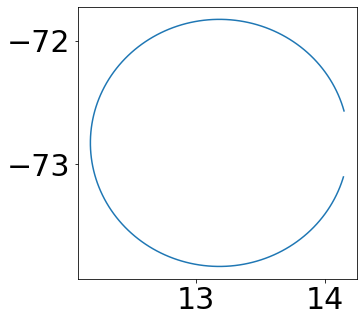

In [106]:
circ = xy_offcircle(1,np.radians(range(15,345)),13.18333333, -72.82833333)
plt.figure(figsize=[5,5])
for i in range(1,6)
plt.plot(circ[0],circ[1])

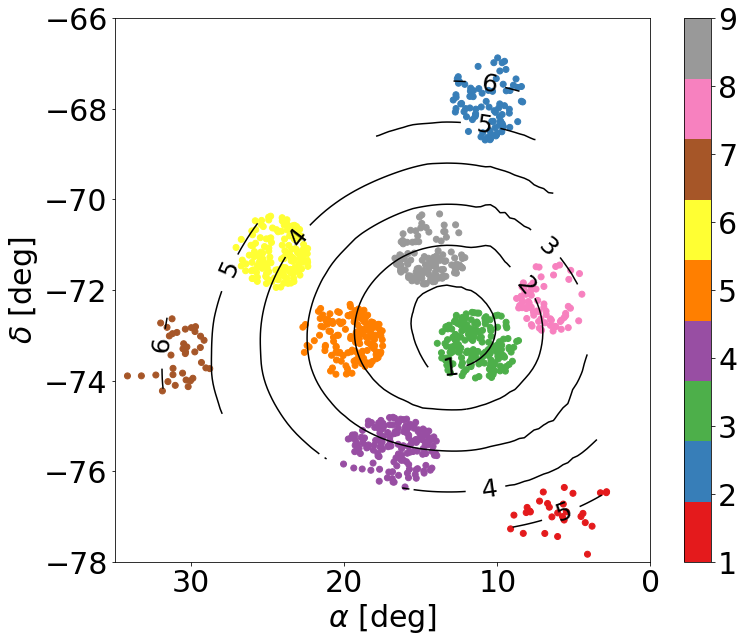

In [27]:
###############
### SMC Map ###
###############

### Map

from scipy.interpolate import griddata

xx,yy = np.meshgrid(np.linspace(np.min(smc['RA']),np.max(smc['RA']),100),
                    np.linspace(np.min(smc['DEC']),np.max(smc['DEC']),100))

points = np.array([smc['RA'],smc['DEC']]).T

grid_z0 = griddata(points, radius, (xx, yy), method='cubic')

field_color = []
for i in range(len(smc)):
    if smc['FIELD'][i] == '47TUC':
        field_color.append(8.0)
    if smc['FIELD'][i] == 'N362':
        field_color.append(9.0)
    if smc['FIELD'][i] == 'SMC1':
        field_color.append(1.0)
    if smc['FIELD'][i] == 'SMC2':
        field_color.append(2.0)
    if smc['FIELD'][i] == 'SMC3':
        field_color.append(3.0)
    if smc['FIELD'][i] == 'SMC4':
        field_color.append(4.0)
    if smc['FIELD'][i] == 'SMC5':
        field_color.append(5.0)
    if smc['FIELD'][i] == 'SMC6':
        field_color.append(6.0)
    if smc['FIELD'][i] == 'SMC7':
        field_color.append(7.0)

matplotlib.rcParams.update({'font.size': 30})
# plt.figure(figsize=[12,12])

fig, ax = plt.subplots(figsize=[12,10])

plt.scatter(smc['RA'],smc['DEC'],c=field_color,cmap='Set1')
plt.colorbar()

plt.xlim(0,35)
plt.ylim(-78,-66)

plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()

CS = plt.contour(xx,yy,grid_z0*1.05,levels=[1,2,3,4,5,6],colors='k')
plt.clabel(CS,fmt='%2.1d',colors='k',fontsize=25)#,manual=locations)

# plt.xticks([-8,-4.0,0,4.0,8])
# plt.yticks([-8,-4.0,0,4.0,8])

plt.xlabel(r'$\alpha$ [deg]')
plt.ylabel(r'$\delta$ [deg]')

# plt.savefig('SmcGeometry.pdf',bbox_inches='tight')
plt.show()


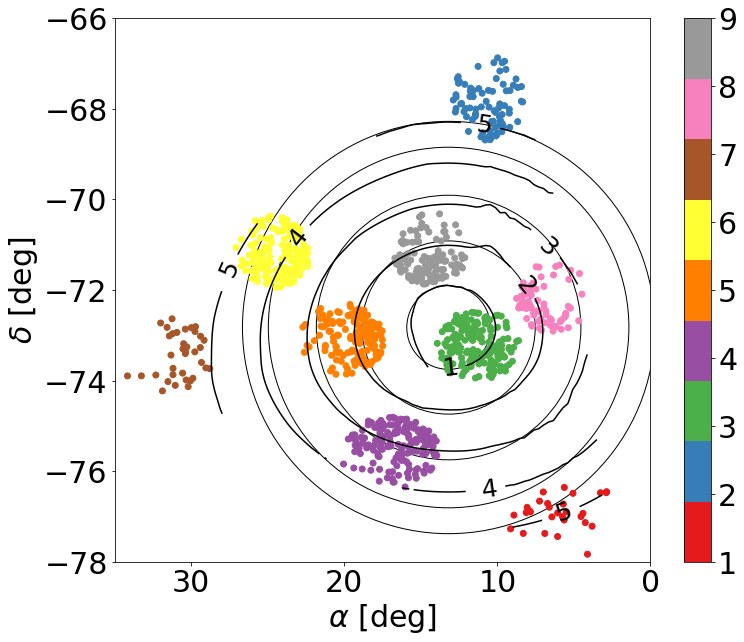

In [142]:
fig, ax = plt.subplots(figsize=[12,10])

# plt.plot(xy_offcircle(1,np.radians(range(15,345)),13.18333333, -72.82833333))
plt.scatter(13.18333333, -72.82833333,facecolors='none',edgecolors='k',s=7000)
plt.scatter(13.18333333, -72.82833333,facecolors='none',edgecolors='k',s=30000)
plt.scatter(13.18333333, -72.82833333,facecolors='none',edgecolors='k',s=70000)
plt.scatter(13.18333333, -72.82833333,facecolors='none',edgecolors='k',s=130000)
plt.scatter(13.18333333, -72.82833333,facecolors='none',edgecolors='k',s=170000)

plt.scatter(smc['RA'],smc['DEC'],c=field_color,cmap='Set1')
plt.colorbar()

plt.xlim(0,35)
plt.ylim(-78,-66)

plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()

CS = plt.contour(xx,yy,grid_z0*1.05,levels=[1,2,3,4,5],colors='k')
plt.clabel(CS,fmt='%2.1d',colors='k',fontsize=25)#,manual=locations)

# plt.xticks([-8,-4.0,0,4.0,8])
# plt.yticks([-8,-4.0,0,4.0,8])

plt.xlabel(r'$\alpha$ [deg]')
plt.ylabel(r'$\delta$ [deg]')

# plt.savefig('SmcGeometry.pdf',bbox_inches='tight')
plt.show()

In [108]:
range(1,6)[0]

1

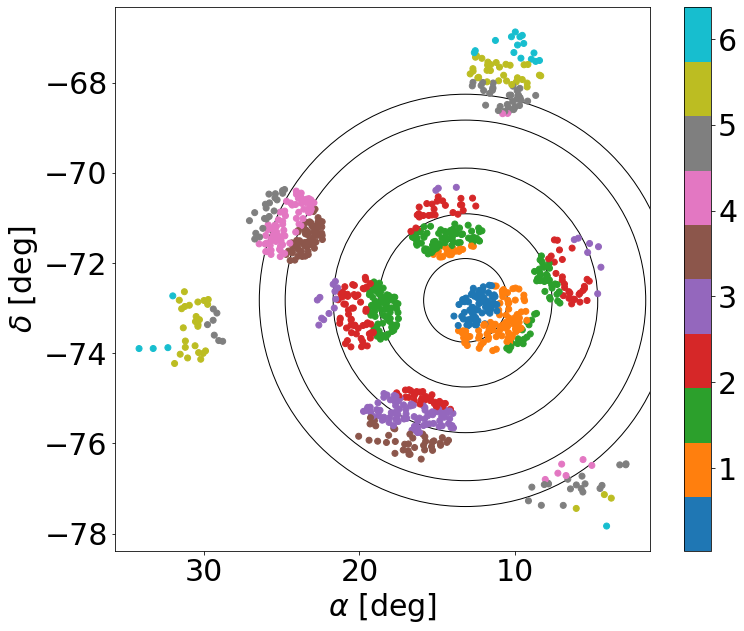

In [143]:
fig, ax = plt.subplots(figsize=[12,10])

plt.scatter(13.18333333, -72.82833333,facecolors='none',edgecolors='k',s=7000)
plt.scatter(13.18333333, -72.82833333,facecolors='none',edgecolors='k',s=30000)
plt.scatter(13.18333333, -72.82833333,facecolors='none',edgecolors='k',s=70000)
plt.scatter(13.18333333, -72.82833333,facecolors='none',edgecolors='k',s=130000)
plt.scatter(13.18333333, -72.82833333,facecolors='none',edgecolors='k',s=170000)

plt.scatter(smc['RA'],smc['DEC'],c=radius,cmap='tab10')
plt.colorbar()

# circle1 = plt.Circle((0,0), 0.1)
# ax.add_artist(circle1)

plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()

# CS = plt.contour(xx,yy,np.sqrt((xx-np.median(smc['RA']))**2/1.81**2+(yy-np.median(smc['DEC']))**2)*1.05,
#                  levels=[1,2,3,4,5,6],colors='k')
# plt.clabel(CS,fmt='%2.1d',colors='k',fontsize=25)#,manual=locations)

# plt.Circle((np.median(smc['RA']),np.median(smc['DEC'])), 1.0, color='black', fill=False)

# plt.xticks([-8,-4.0,0,4.0,8])
# plt.yticks([-8,-4.0,0,4.0,8])

# plt.xlim(-8.5,8.5)
# plt.ylim(-8.5,8.5)

# plt.title(r'Color as Distance [kpc]')
plt.xlabel(r'$\alpha$ [deg]')
plt.ylabel(r'$\delta$ [deg]')

# plt.savefig('SmcGeometry.pdf',bbox_inches='tight')
plt.show()

6.0685654
6.300000000000001


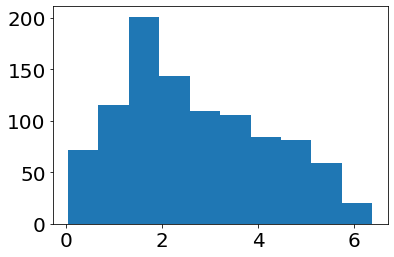

In [67]:
plt.hist(smc['SMCRAD']*1.05)
print(max(smc['SMCRAD']))
print(6*1.05)

<font size='15'>
    <b>
        Initial MLE Fit
    </b>
</font>

In [30]:
##############################
### Fit Overall Trendlines ###
##############################

med_ms = []
med_bs = []

### Initial fit
for i in tqdm_notebook(range(len(elems)-5),desc='Done?'):
    
    # clean up data
    cln = np.where((smc[elems[i]]>-100)&(smc['SNR']>=100))
    
    # fit data
    slope, inter = mlefit.mle_fit(radius[cln],smc[elems[i]][cln],smc[elems_err[i]][cln])
    med_ms.append(slope)
    med_bs.append(inter)

In [31]:
smc_initfitcat = Table()

smc_initfitcol_elems = Column(np.array(['M_H','C_Fe','N_Fe','O_Fe','Na_Fe','Mg_Fe','Al_Fe','Si_Fe','P_Fe','S_Fe',
                                    'K_Fe','Ca_Fe','Ti_Fe','TiII_FE','V_Fe','Cr_Fe','Mn_Fe','Fe_H','Co_Fe',
                                    'Ni_Fe','Cu_Fe']),name='X_FE')

smc_initfitcol_grad = Column(np.asarray(med_ms),name='GRAD')
smc_initfitcol_inter = Column(np.asarray(med_bs),name='INTER')

smc_initfitcat.add_column(smc_initfitcol_elems)
smc_initfitcat.add_column(smc_initfitcol_grad)
smc_initfitcat.add_column(smc_initfitcol_inter)

# smc_initfitcat.write('smc_initfit.fits',format='fits',overwrite=True)

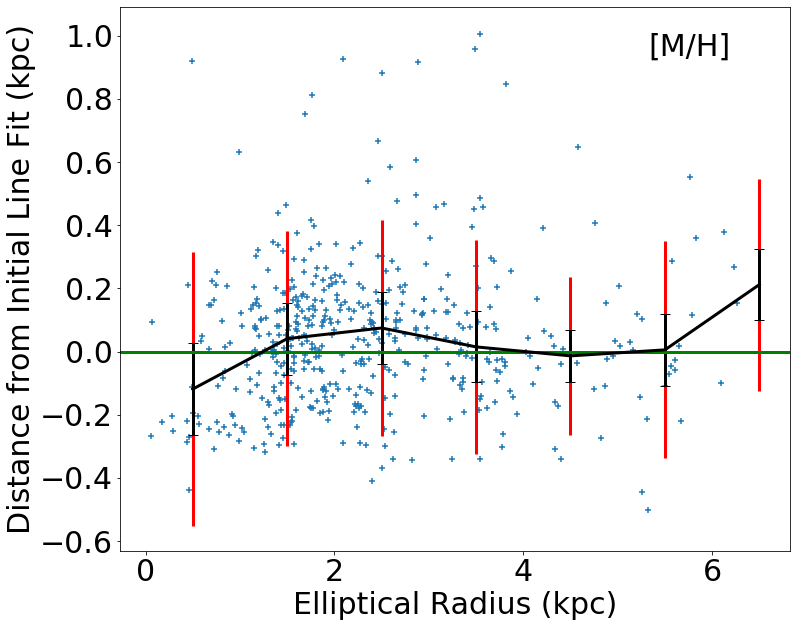

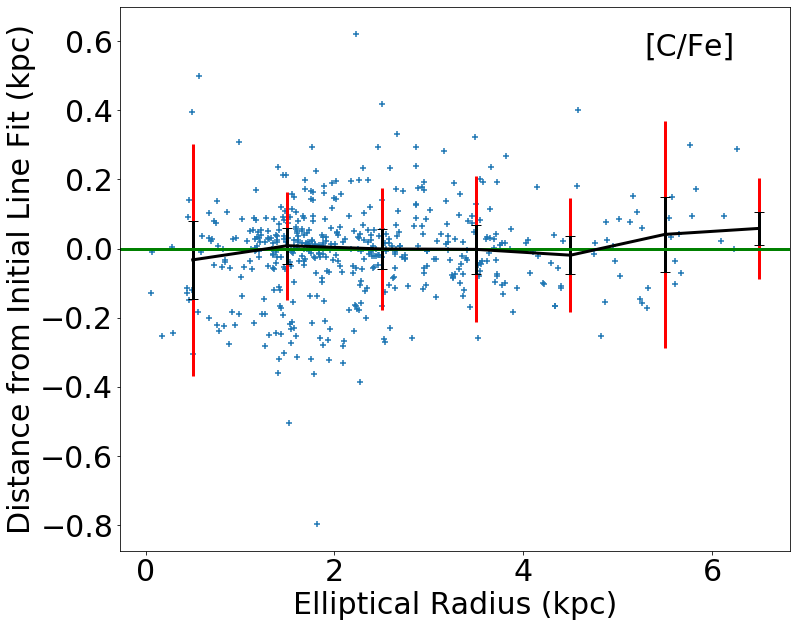

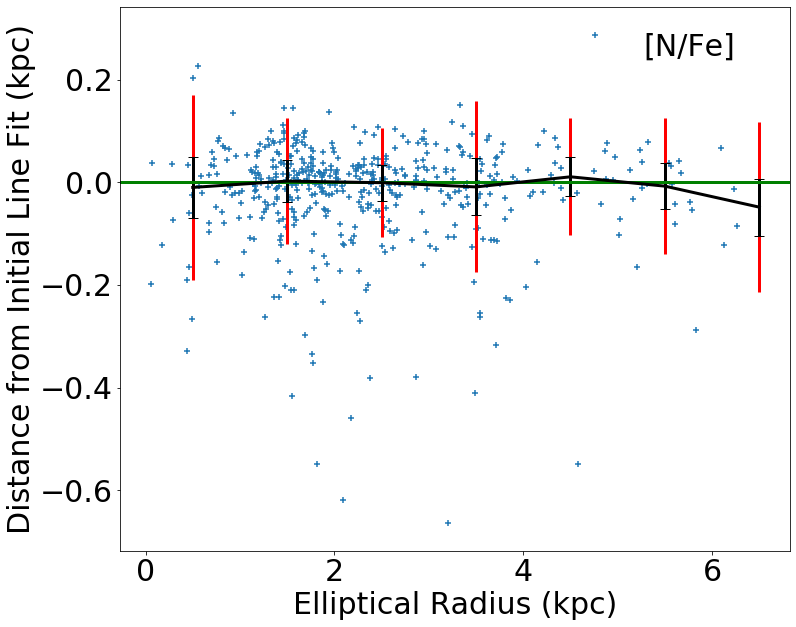

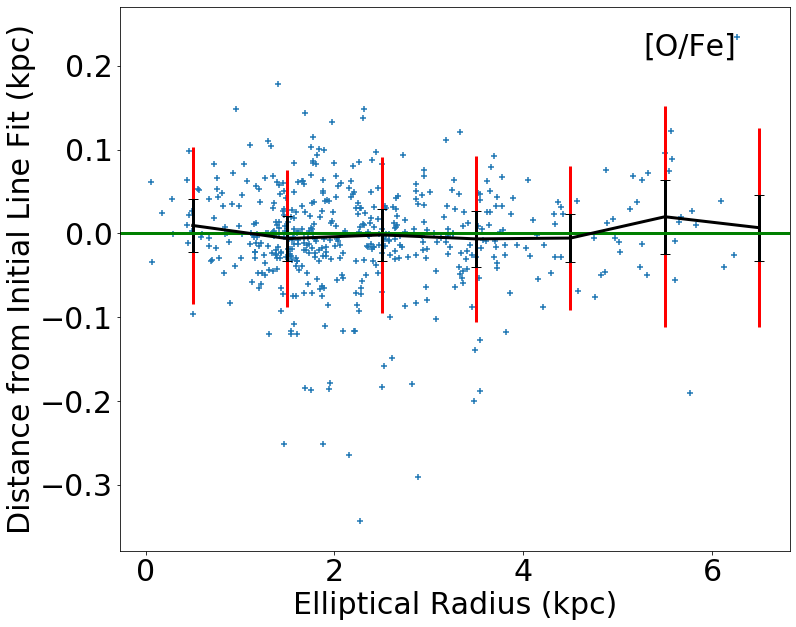

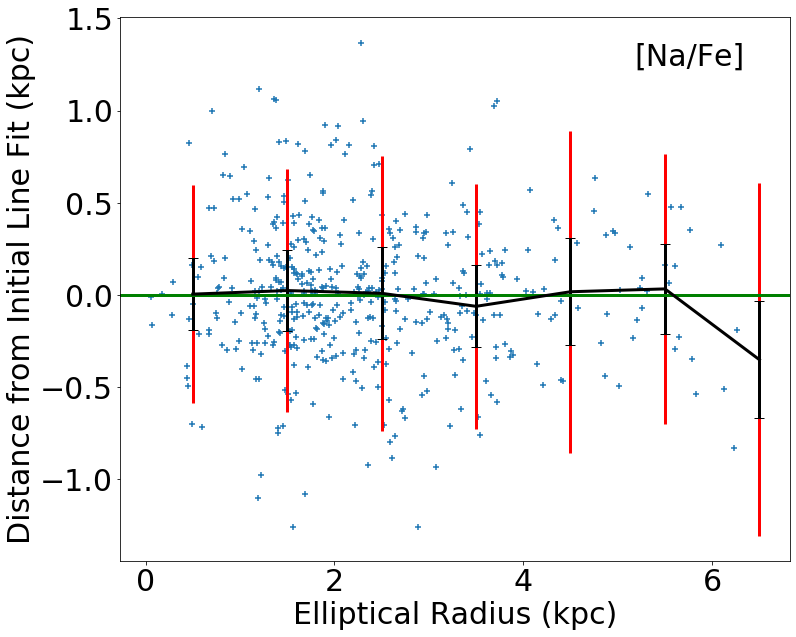

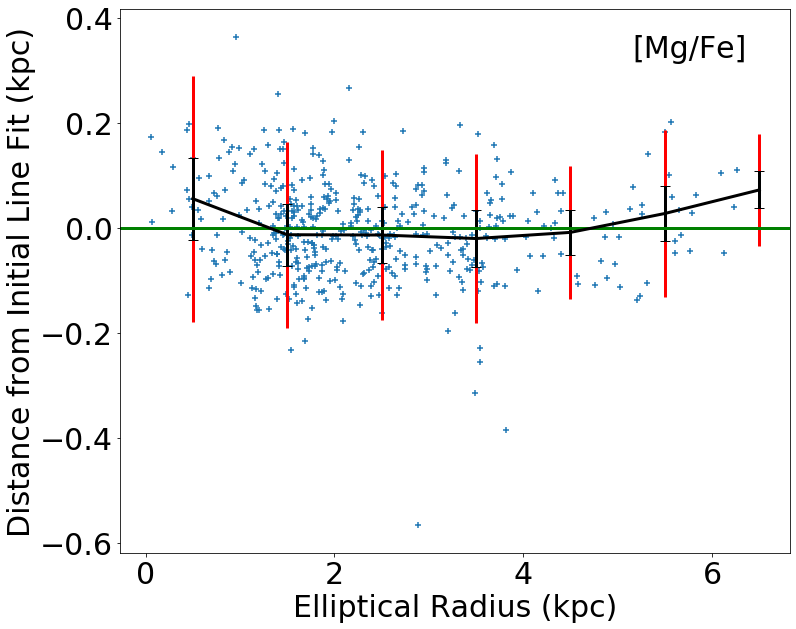

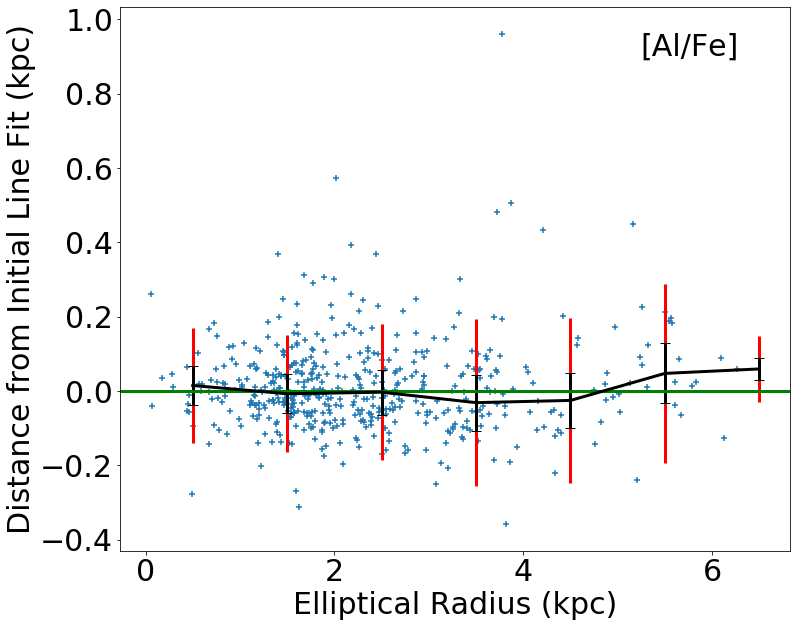

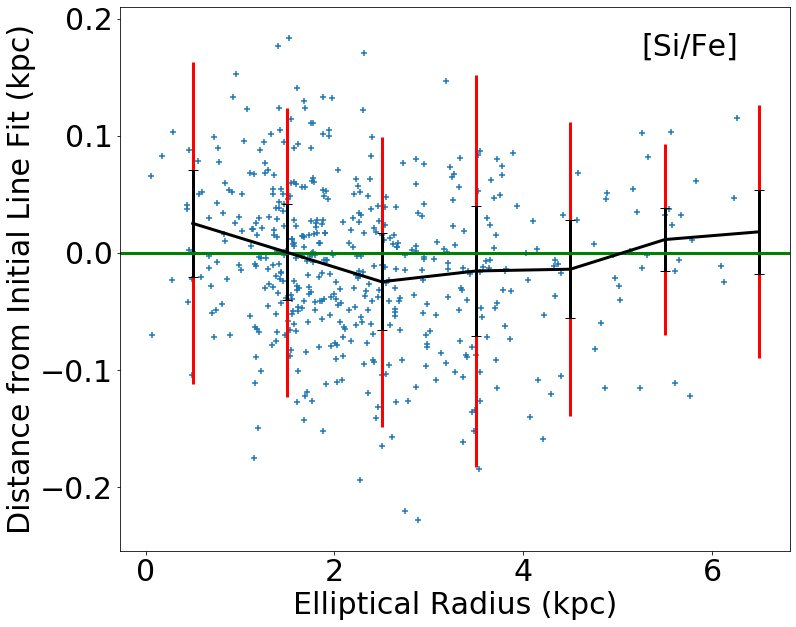

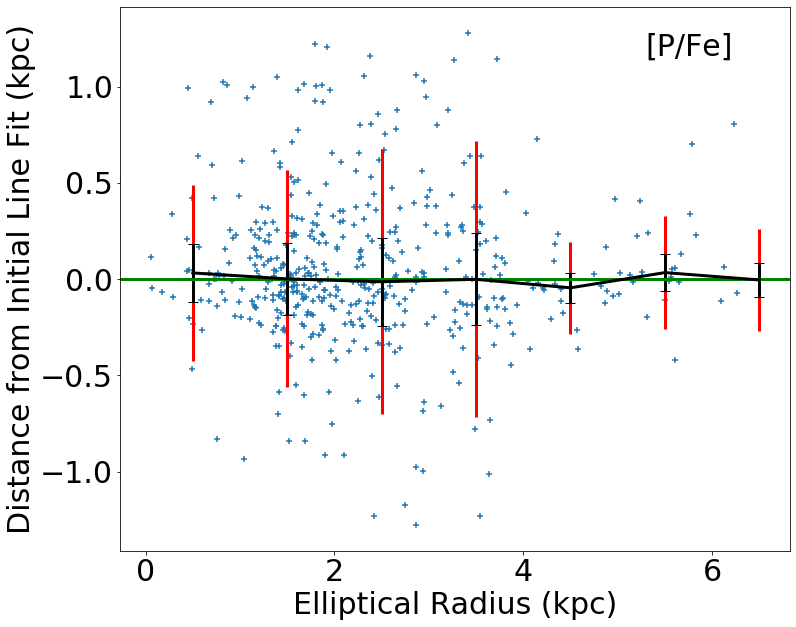

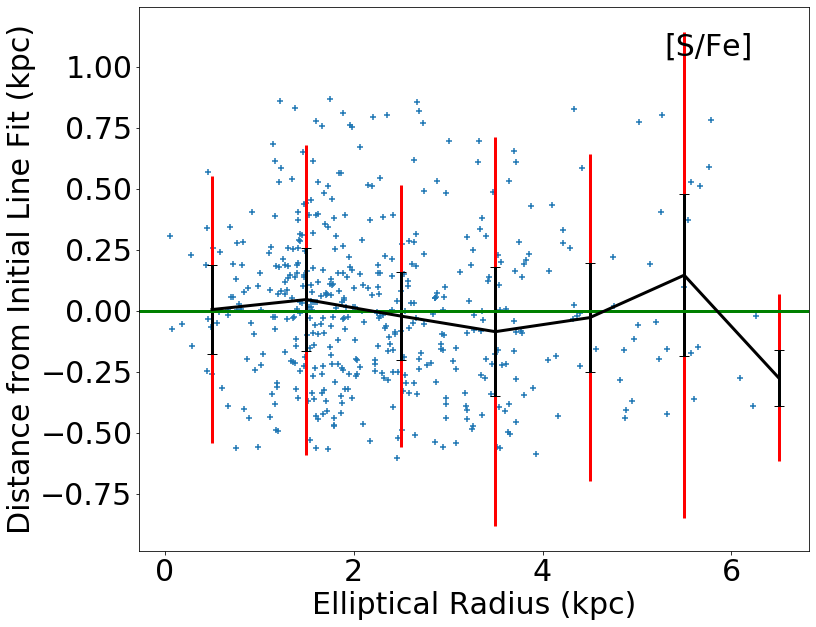

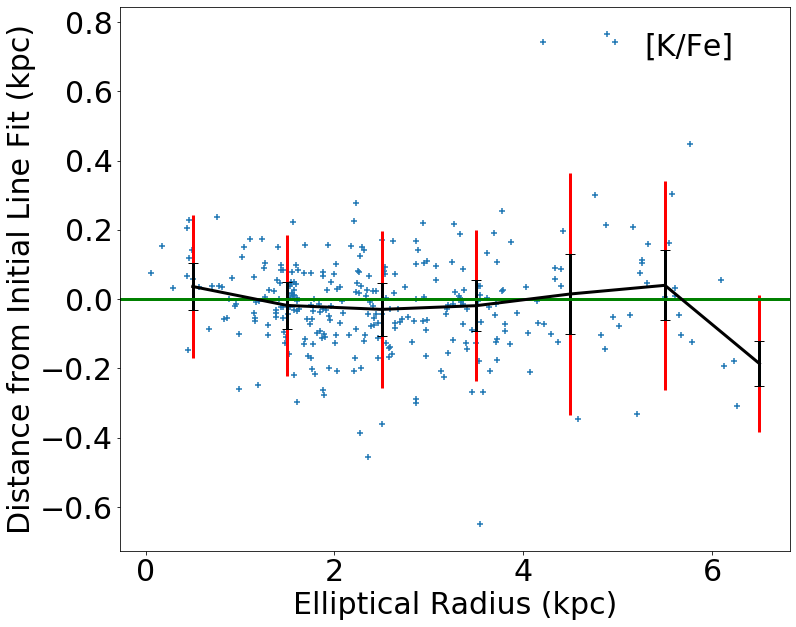

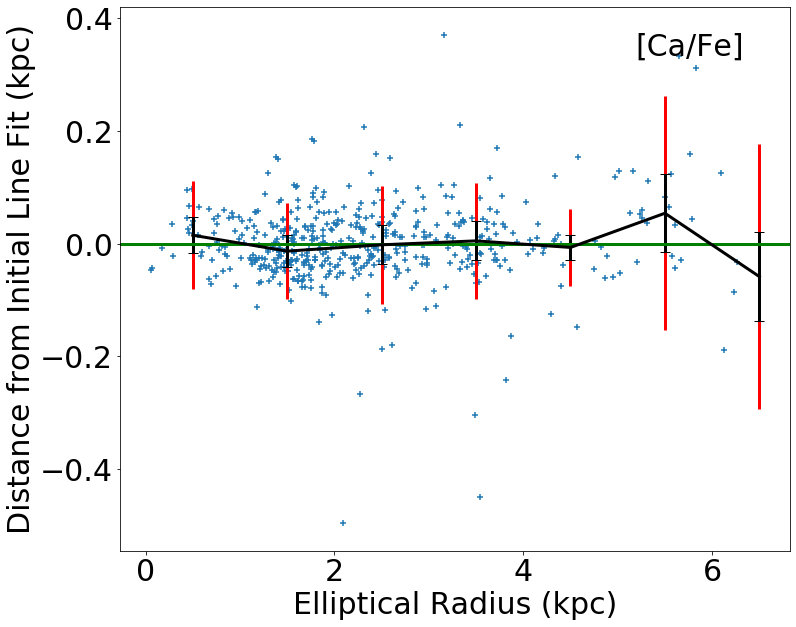

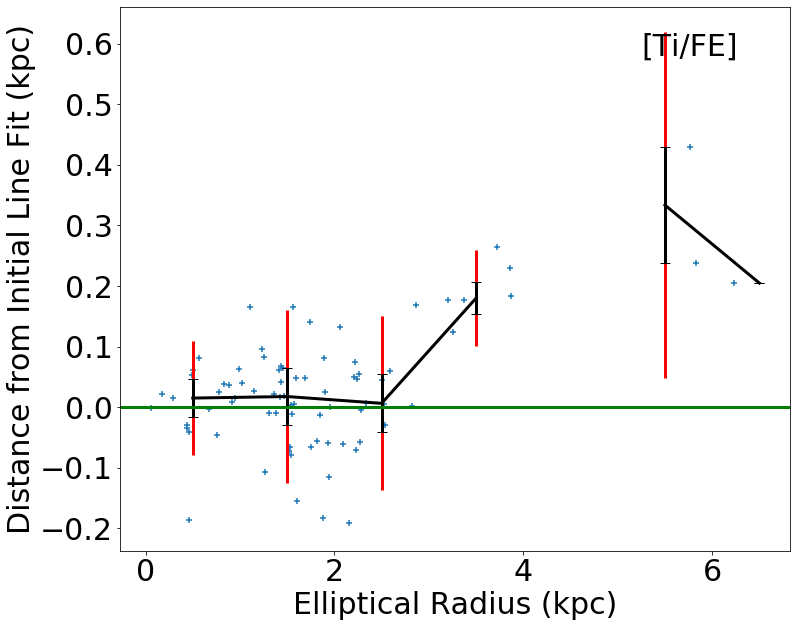

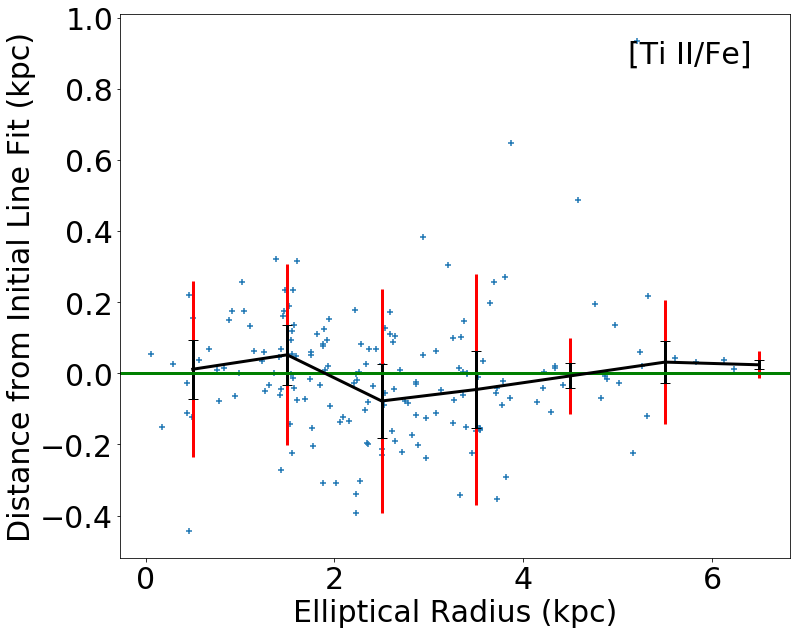

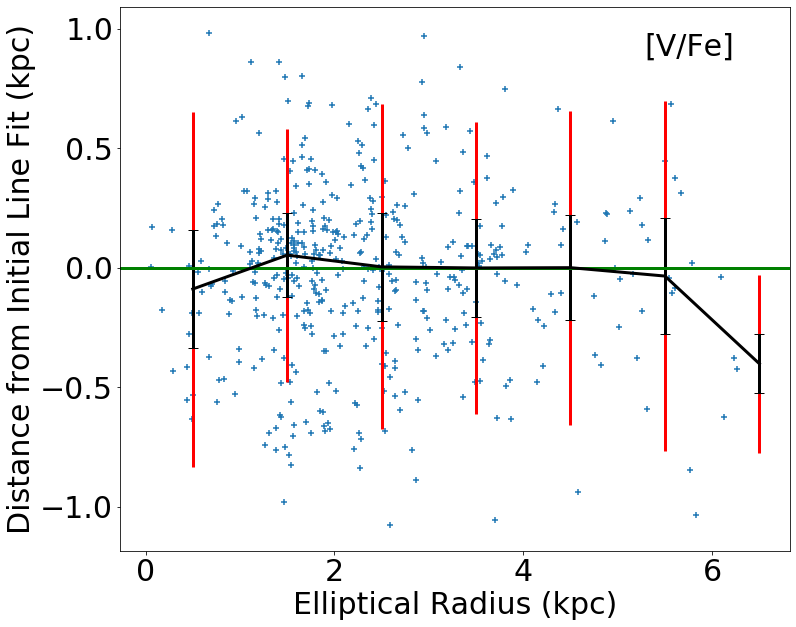

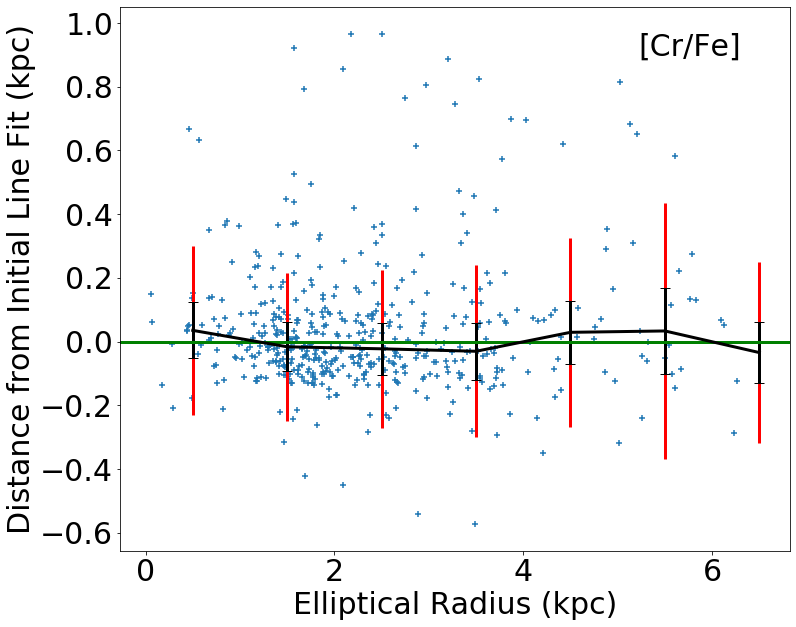

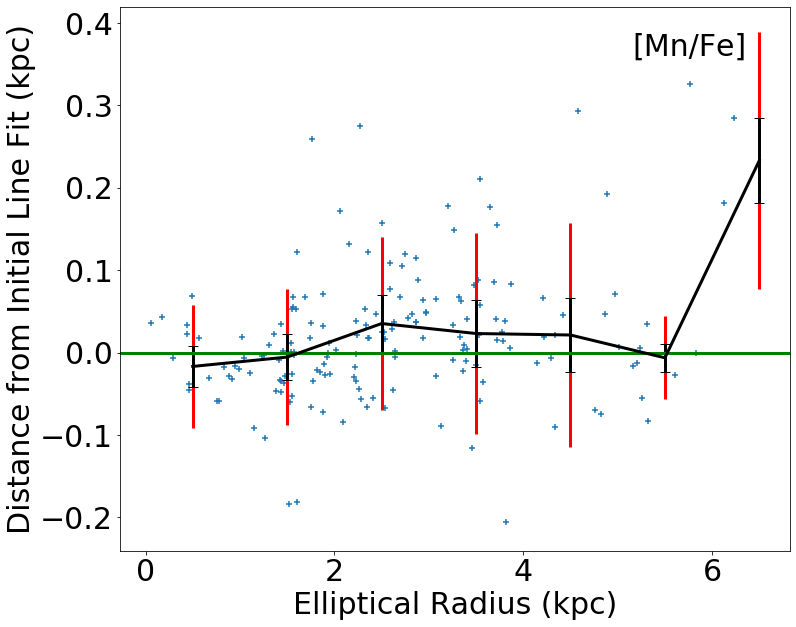

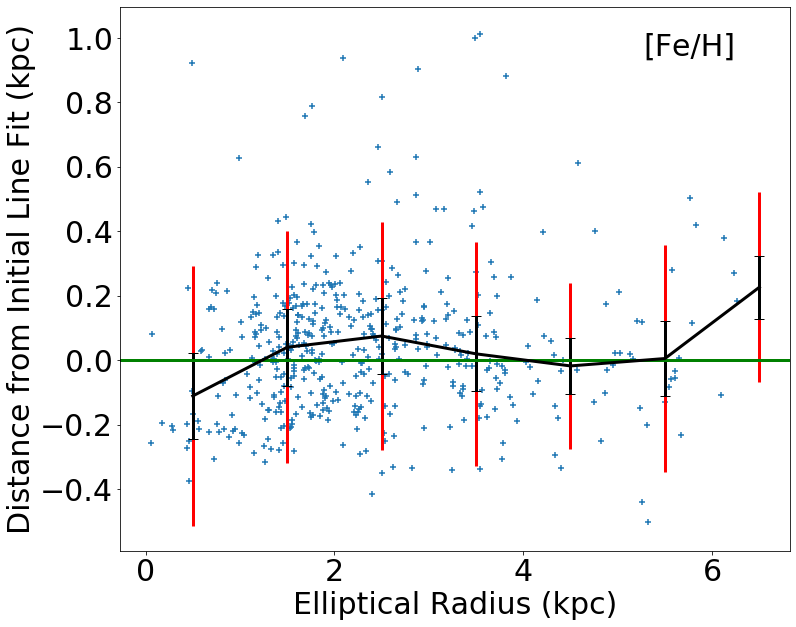

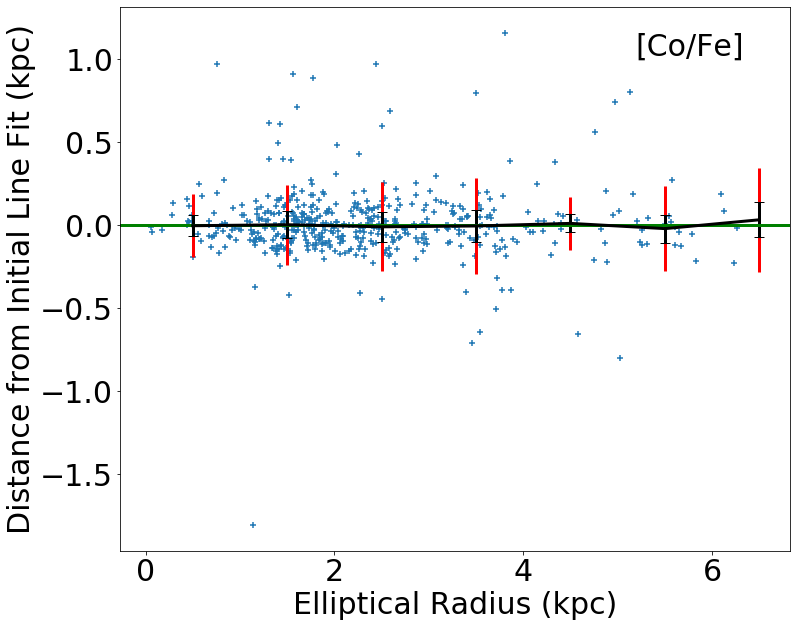

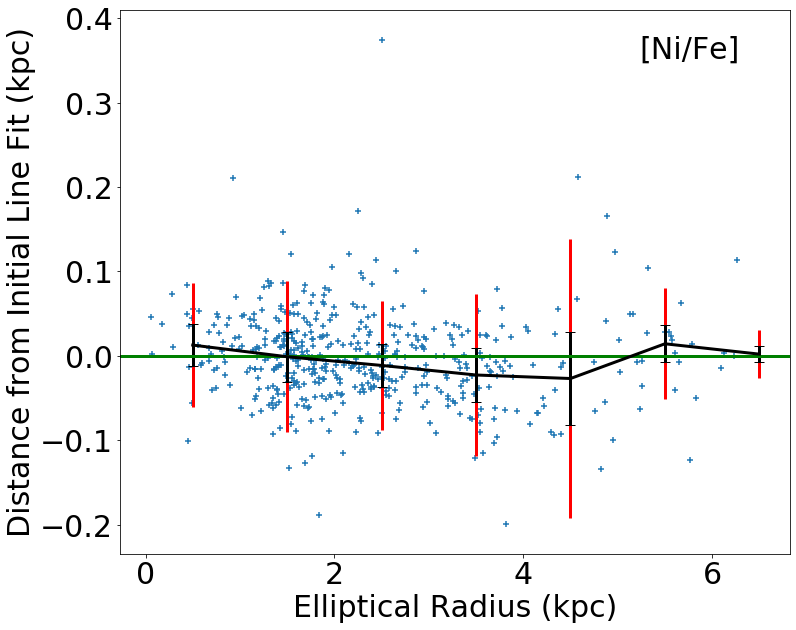

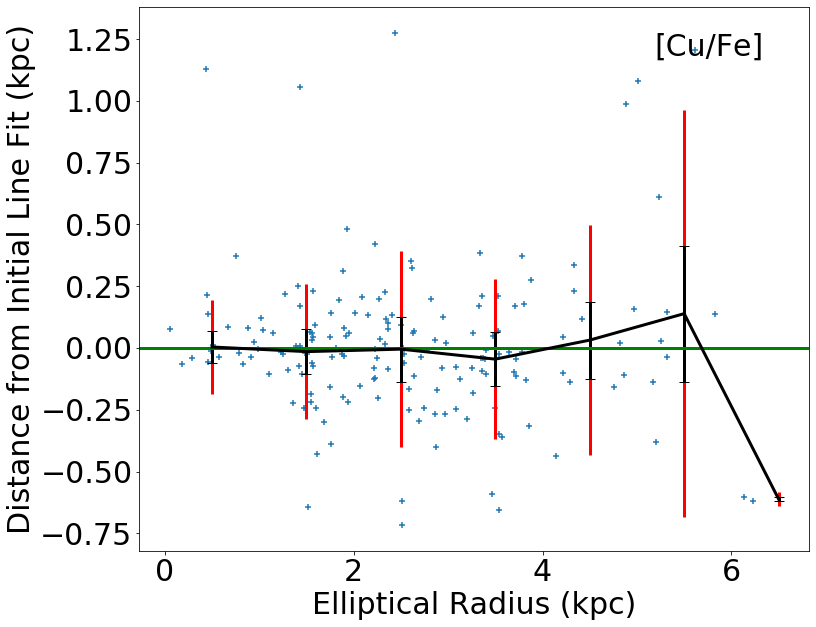

In [32]:
from scipy.stats import binned_statistic
# matplotlib.rcParams.update({'font.size': 18})
med_elems_dist = []
for i in tqdm_notebook(range(len(elems)-5),desc='Done?'):
    
    def trendline(x):
        return med_ms[i]*x+med_bs[i]
    
    cln = np.where((smc[elems[i]]>-100)&(smc['SNR']>=100))
    plug = trendline(radius[cln])
    dist = plug-smc[elems[i]][cln]
    
    med_elems_dist.append(dist)    
    
    bins = np.append(np.arange(np.floor(np.min(radius[cln])),np.ceil(np.max(radius[cln])),1.0),
                     np.ceil(np.max(radius[cln]))+1) 
    bin_dist, _, _ = binned_statistic(radius[cln],dist,statistic='median',bins=bins)
    bin_spr, _, _ = binned_statistic(radius[cln],dist,statistic=lambda y: np.median(np.absolute(y-np.median(y))),
                                     bins=bins)
    
    plt.figure(figsize=[12,10])
    plt.scatter(radius[cln],dist,marker='+')
    plt.errorbar(bins[:-1]+0.5,bin_dist,yerr=3*bin_spr,c='r',ls='none',lw=3)
    plt.errorbar(bins[:-1]+0.5,bin_dist,yerr=bin_spr,c='k',capsize=5,lw=3)
    plt.axhline(0.0,c='g',lw=3.0)
    plt.title(r'{}'.format(labs[i]),fontsize=30,x=0.85,y=0.90)#,len(np.squeeze(cln))))
    plt.xlabel(r'Elliptical Radius (kpc)')
    plt.ylabel(r'Distance from Initial Line Fit (kpc)')
#     plt.savefig('outliers{}'.format(elems[i]),bbox_inches='tight')
    plt.show()

In [33]:
med_m_devs = []
med_b_devs = []
re_med_ms = []
re_med_bs = []

prune_fact = 3.
for i in tqdm_notebook(range(len(elems)-5),desc='Done?'):
    
    # clean up data and prune outliers
    cln = np.where((smc[elems[i]]>-100)&(smc['SNR']>=100))
    prune = np.where((smc[elems[i]]>-prune_fact*util.mad(med_elems_dist[i])+
                      np.median(smc[cln][elems[i]]))&
                     (smc[elems[i]]<prune_fact*util.mad(med_elems_dist[i])+
                      np.median(smc[cln][elems[i]])))

    exog = radius[prune]
    endog = smc[elems[i]][prune]
    endog_err = smc[elems_err[i]][prune]
    
    slps = []
    ints = []
    
    # resample with replacement 100 times and fit lines
    for j in tqdm_notebook(range(1000),leave=False,desc='Iteration'):
        
        ind = np.floor(np.random.random(len(endog))*(len(endog)-1)).astype(int)
        indexog = exog[ind]
        indendog = endog[ind]
        indendog_err = endog_err[ind]
        
        # fit sampled data
        try:
            sample_slope, sample_inter = mlefit.mle_fit(indexog,indendog,indendog_err)
            slps.append(sample_slope)
            ints.append(sample_inter)
        
        except:
            slps.append(-9999.0)
            ints.append(-9999.0)
        
    med_m_devs.append(util.mad(slps))
    med_b_devs.append(util.mad(ints))
    
    re_med_ms.append(np.median(slps))
    re_med_bs.append(np.median(ints))

In [1]:
pwd

'/Users/joshpovick/Research/SMC_Gradients'

In [34]:
for i in range(len(re_med_ms)):
    print('{}: slope: {:.4f} +/- {:.4f} inter: {:.4f} +/- {:.4f}'.format(elems[i],re_med_ms[i],med_m_devs[i],
                                                                         re_med_bs[i],med_b_devs[i]))

M_H: slope: -0.0372 +/- 0.0029 inter: -0.9494 +/- 0.0095
C_FE: slope: -0.0049 +/- 0.0025 inter: -0.3849 +/- 0.0066
N_FE: slope: -0.0059 +/- 0.0014 inter: 0.0651 +/- 0.0040
O_FE: slope: 0.0012 +/- 0.0010 inter: 0.0071 +/- 0.0024
NA_FE: slope: -0.0004 +/- 0.0106 inter: -0.1306 +/- 0.0263
MG_FE: slope: 0.0031 +/- 0.0020 inter: 0.0316 +/- 0.0054
AL_FE: slope: -0.0093 +/- 0.0024 inter: -0.4433 +/- 0.0058
SI_FE: slope: 0.0086 +/- 0.0018 inter: -0.0371 +/- 0.0058
P_FE: slope: 0.0092 +/- 0.0039 inter: 0.2295 +/- 0.0111
S_FE: slope: 0.0153 +/- 0.0056 inter: 0.2030 +/- 0.0161
K_FE: slope: 0.0204 +/- 0.0036 inter: -0.0716 +/- 0.0084
CA_FE: slope: 0.0023 +/- 0.0016 inter: 0.0576 +/- 0.0046
TI_FE: slope: -0.0100 +/- 0.0037 inter: -0.1403 +/- 0.0111
TIII_FE: slope: 0.0182 +/- 0.0053 inter: 0.1767 +/- 0.0152
V_FE: slope: 0.0049 +/- 0.0100 inter: -0.1825 +/- 0.0226
CR_FE: slope: -0.0052 +/- 0.0030 inter: -0.0151 +/- 0.0075
MN_FE: slope: -0.0123 +/- 0.0028 inter: -0.1744 +/- 0.0072
FE_H: slope: -0.0392

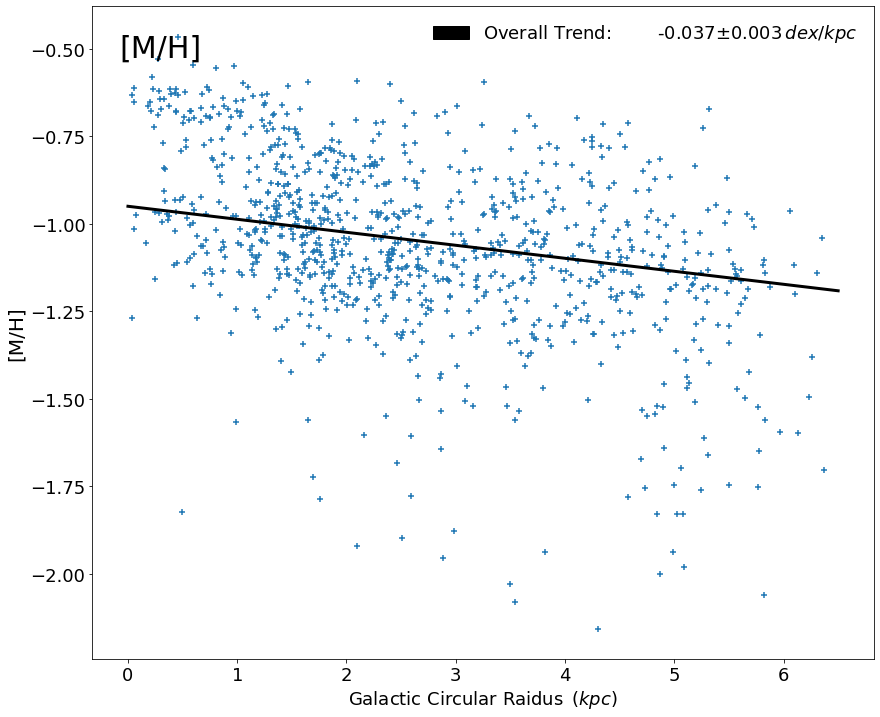

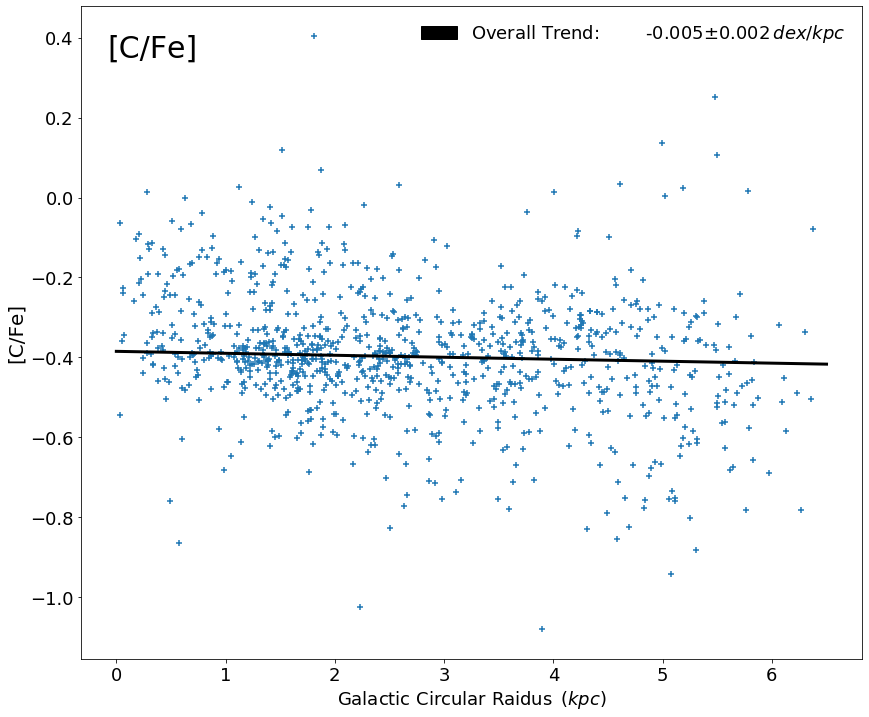

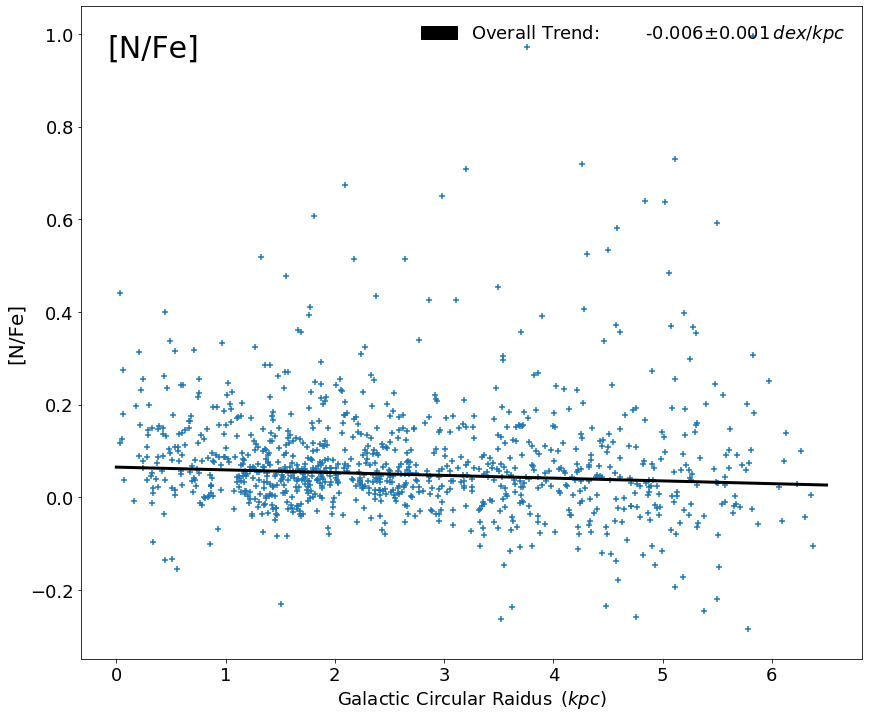

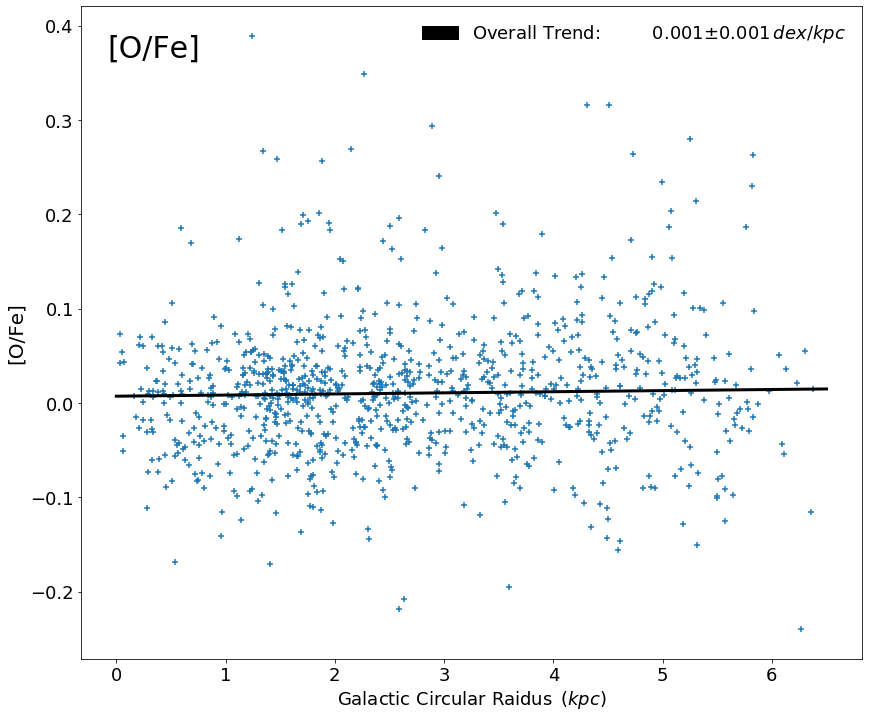

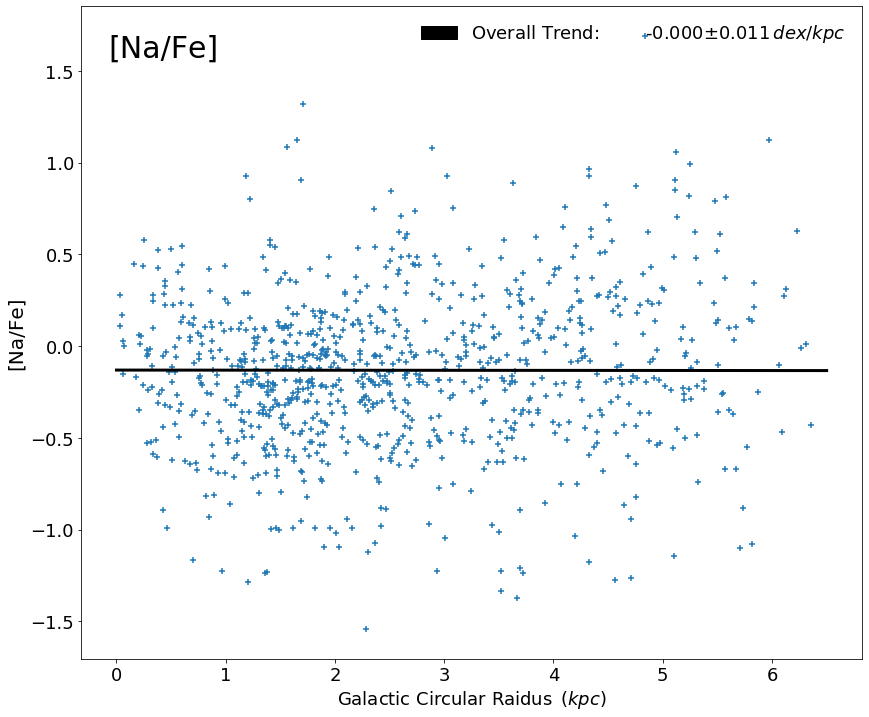

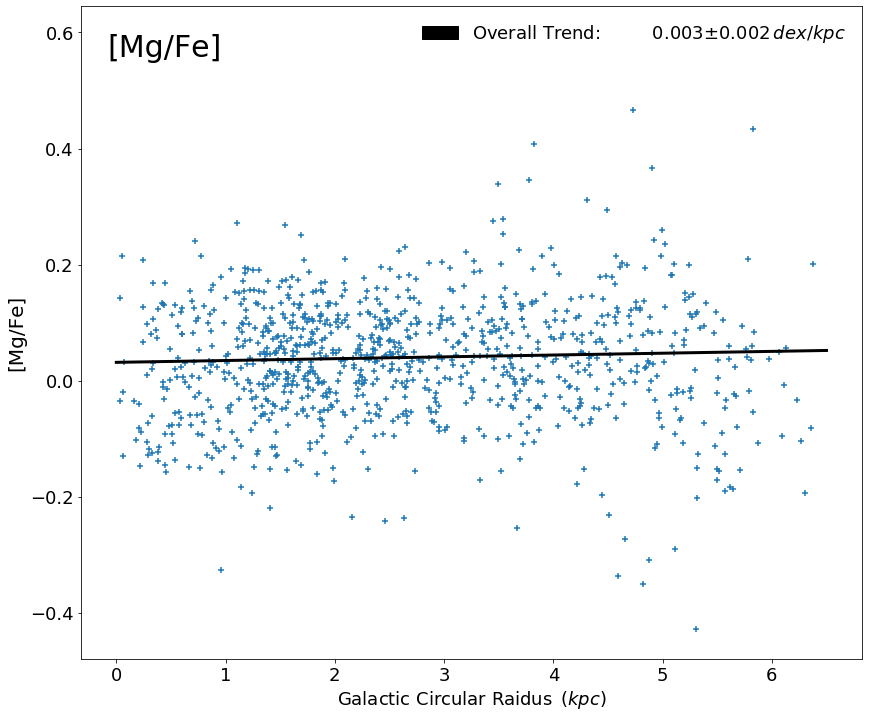

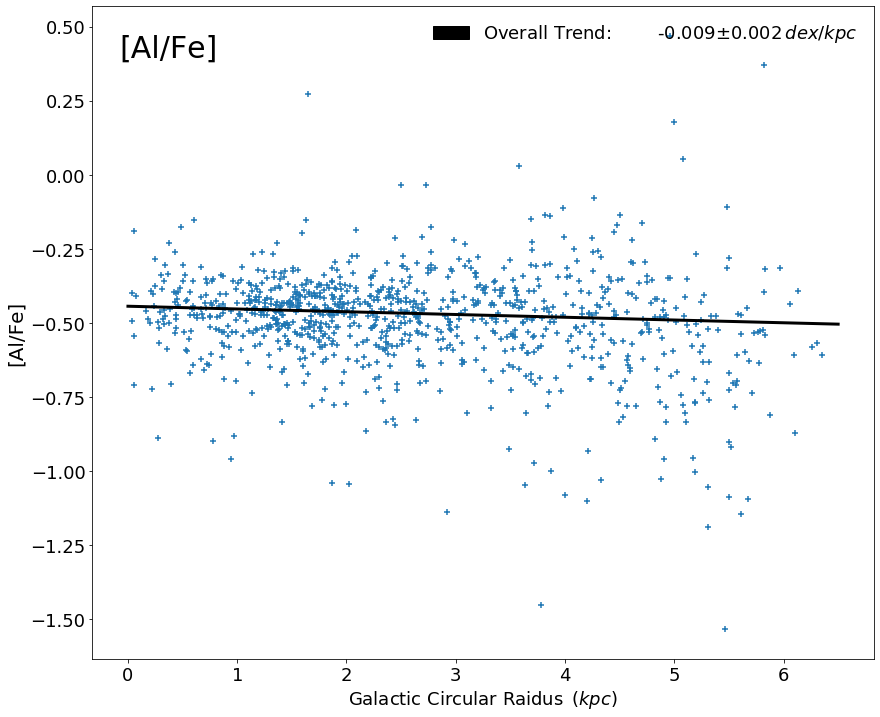

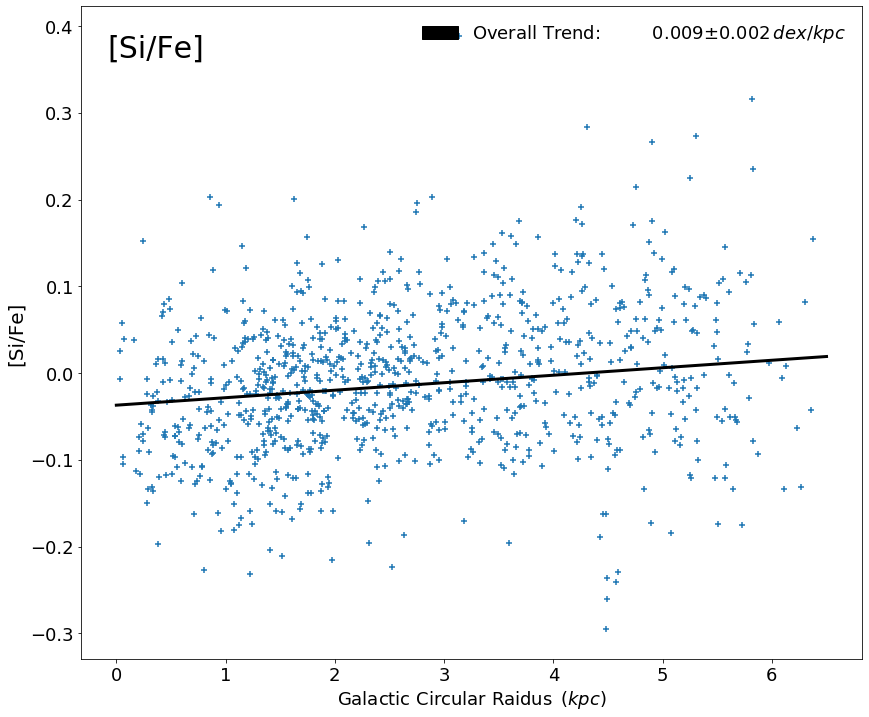

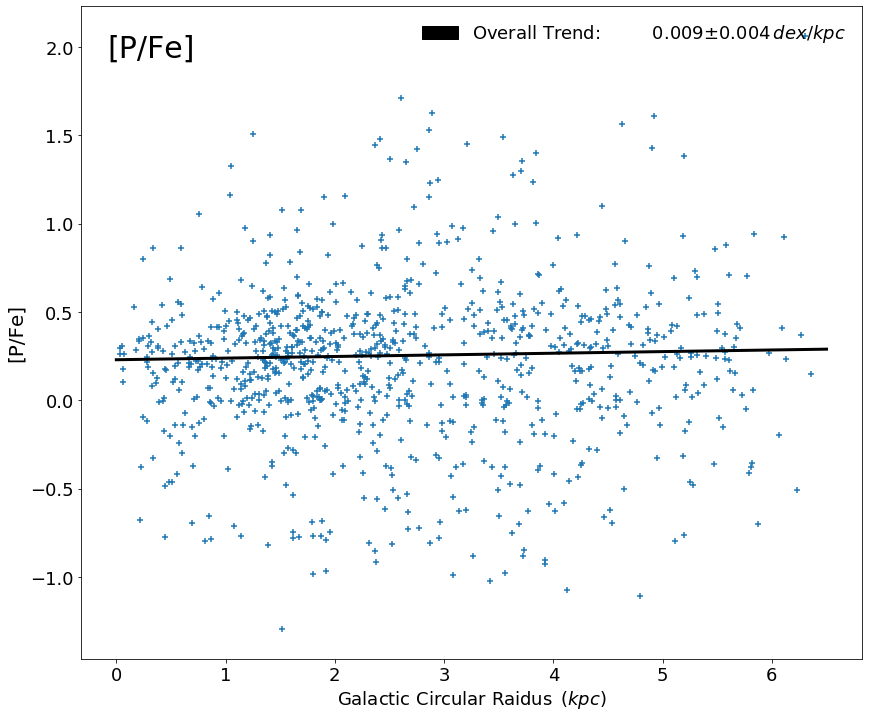

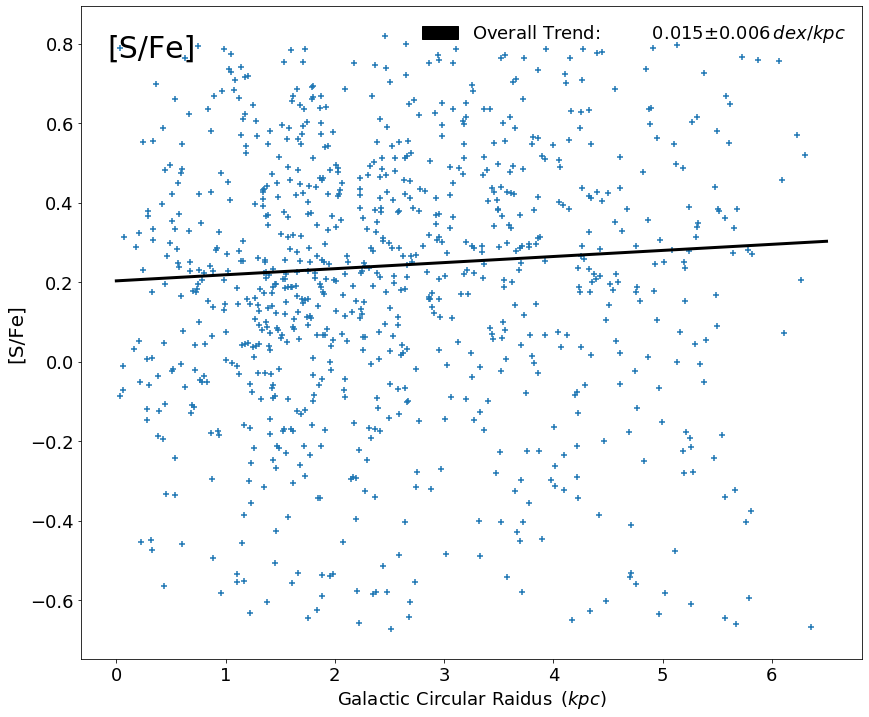

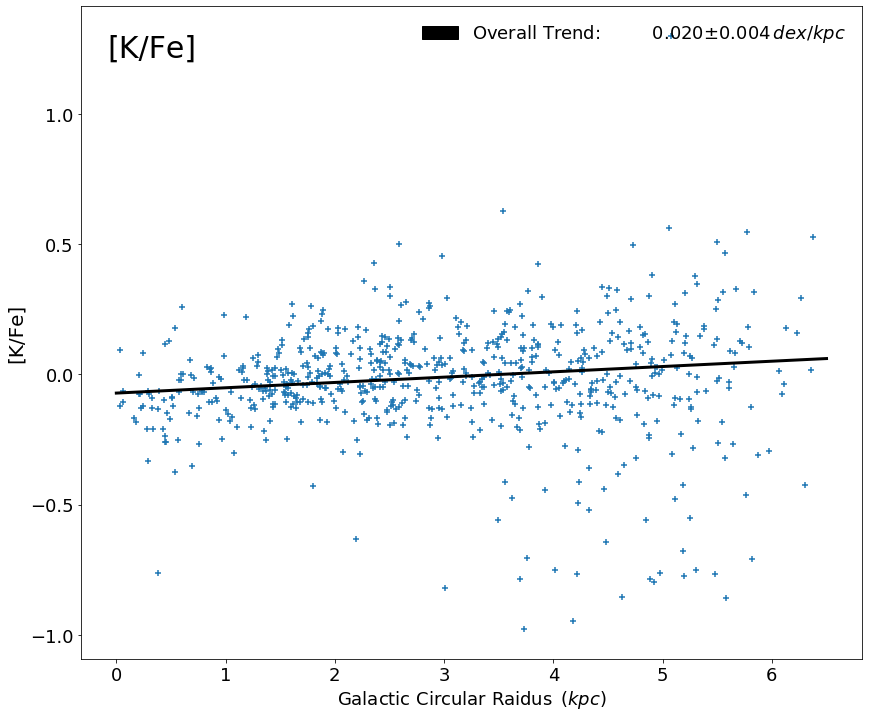

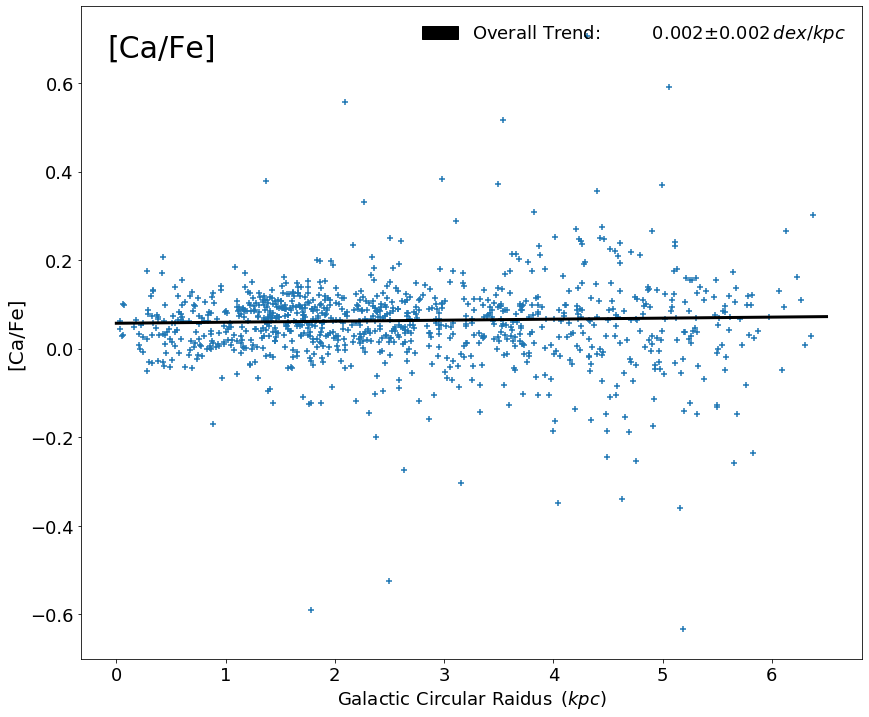

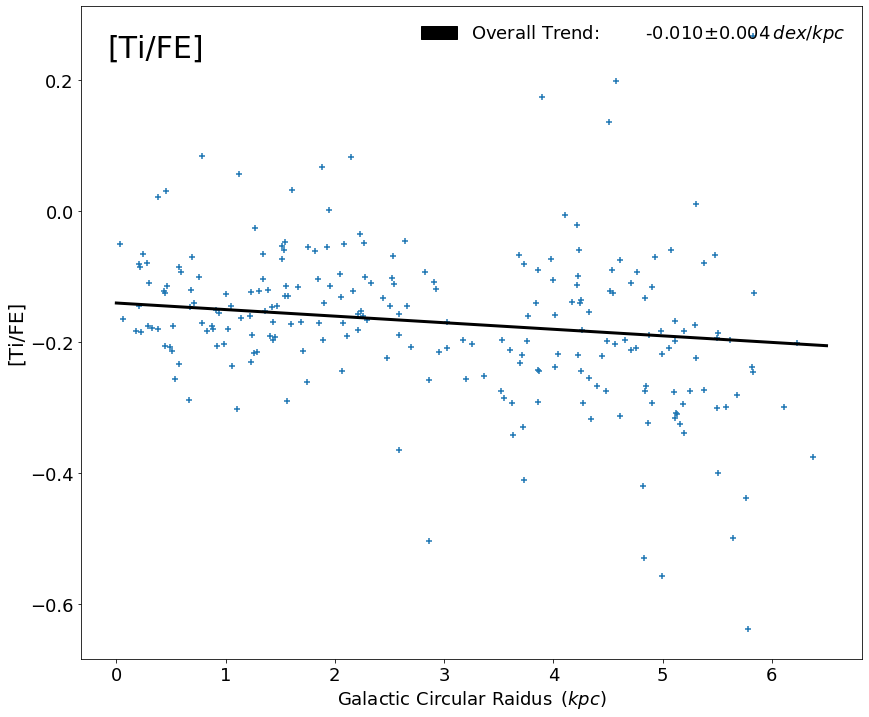

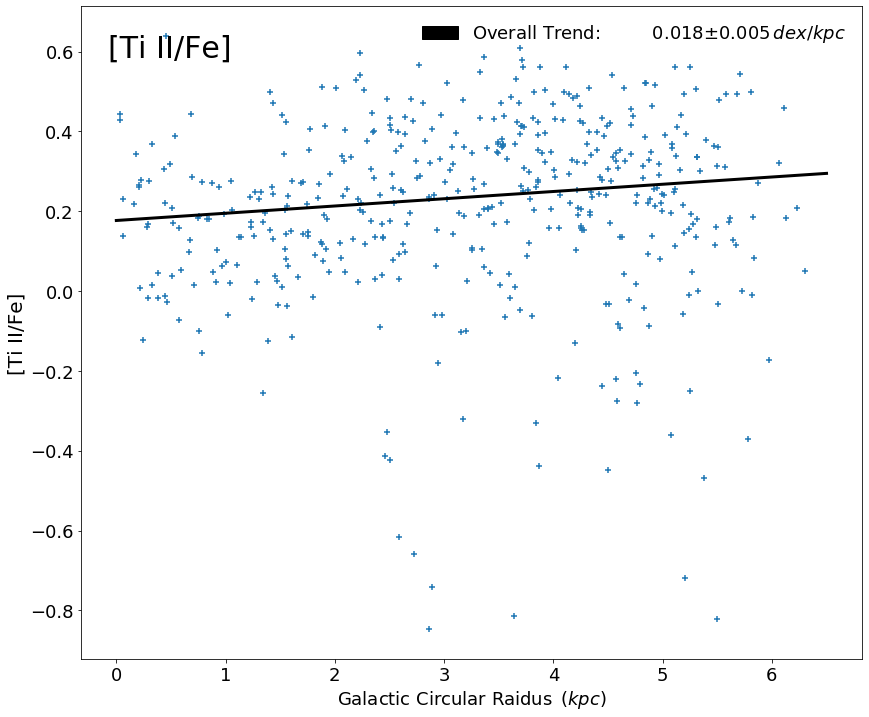

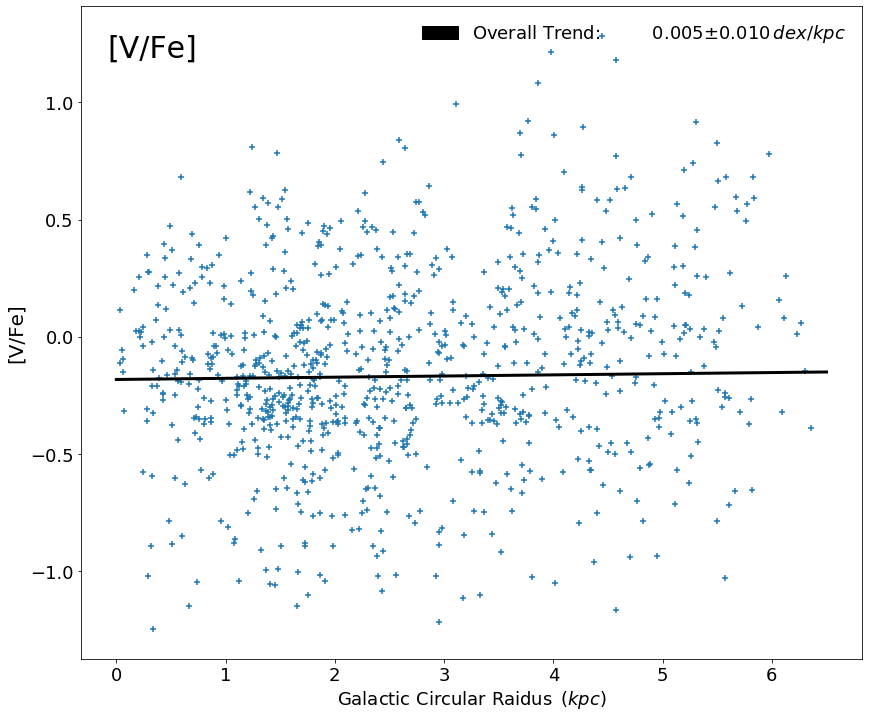

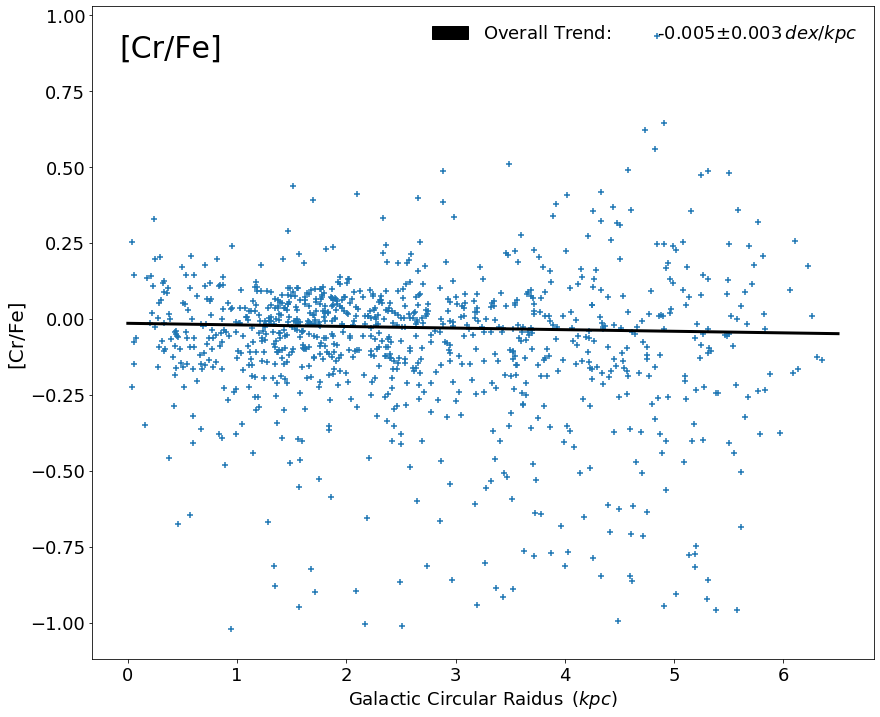

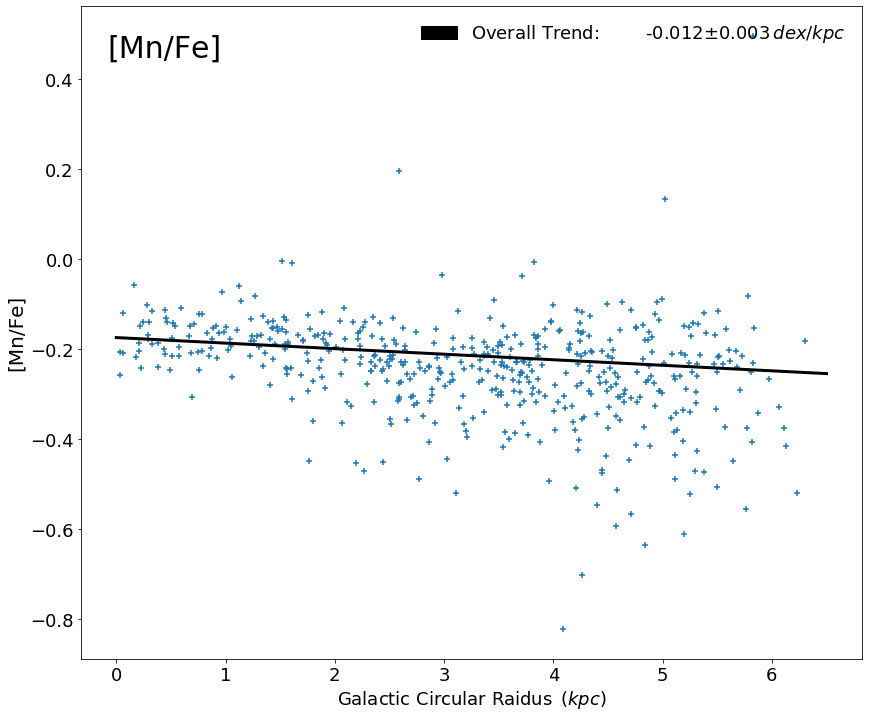

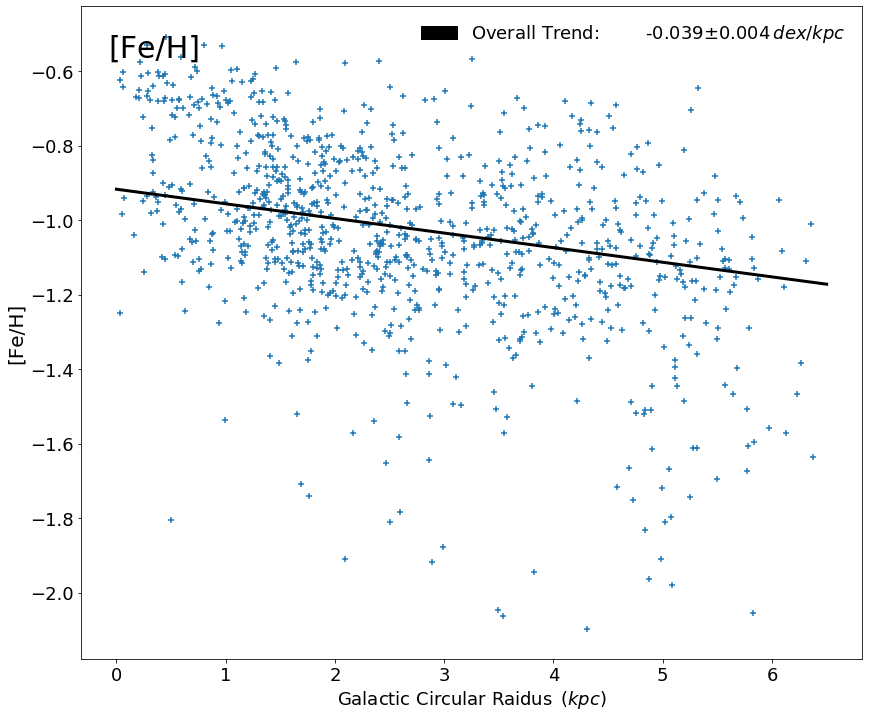

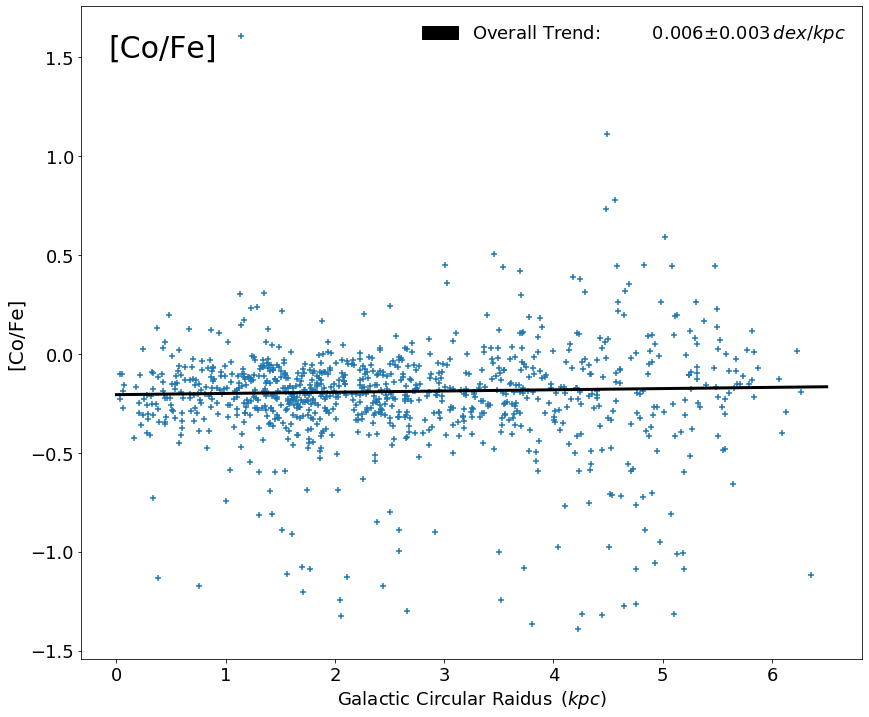

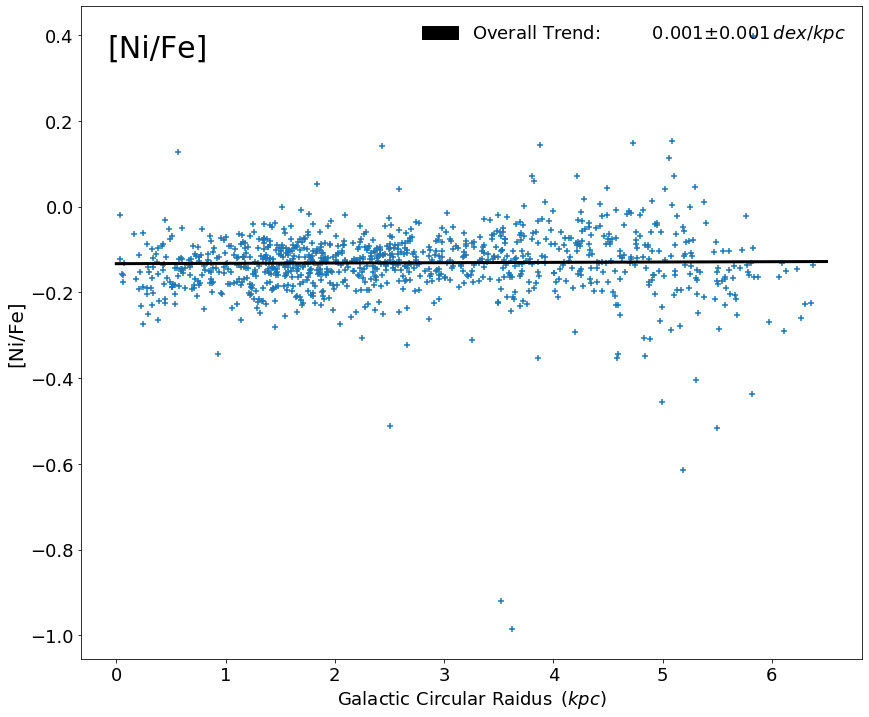

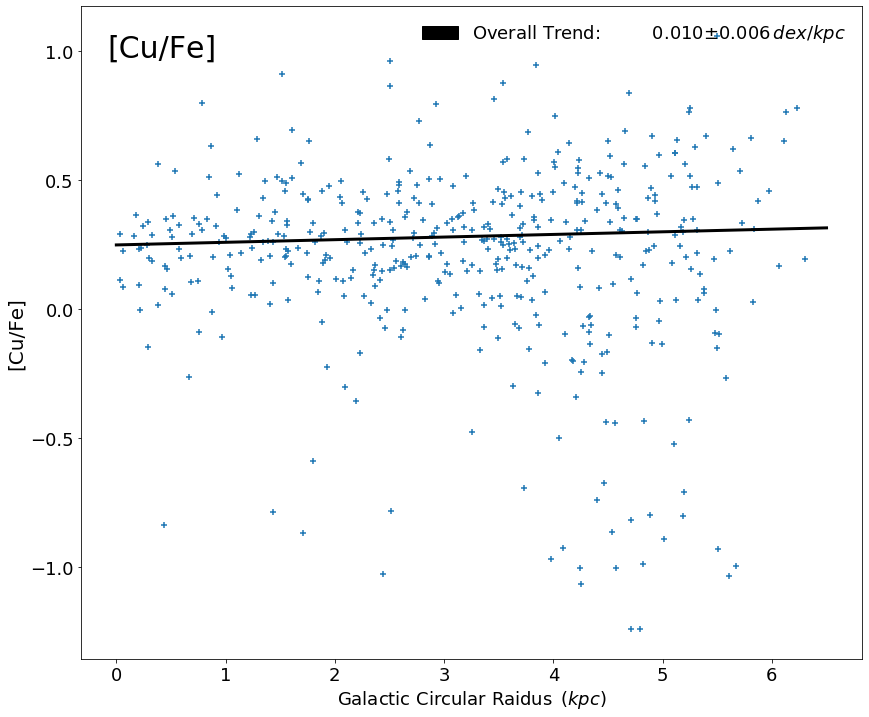

In [35]:
#####################################
### Overall Trend Plots with Data ###
#####################################

matplotlib.rcParams.update({'font.size': 18})

# ytops = [0,0.1,0.7,0.2,1.0,0.4,0,0.325,2.0,0.8,0.8,0.3,0,0,0.75,0.4,0,0.0,0.5,0.0,0,0,0,0,0,0]

for i in tqdm_notebook(range(len(elems)-5),desc='plots',leave=False):
    
    cln = np.where(smc[elems[i]]>-100)
    
    xval = np.linspace(0.0,6.5)

    fig = plt.figure(figsize=[14,12])
    
    ###Overall Trend
    def trendline(x):
        return re_med_ms[i]*x+re_med_bs[i]
    
    plt.plot(xval,trendline(xval),c='k',lw=3.0)
    plt.scatter(np.asarray(radius)[cln],smc[elems[i]][cln],marker='+',c='tab:blue')
    
    handles,labels = plt.gca().get_legend_handles_labels()
    empty_over = mpatches.Patch(color='black',label='Overall Trend')
    handles.append(empty_over)

    labels.append('Overall Trend: {:>13.3f}$\pm {:.3f} \,dex/kpc$'.format(re_med_ms[i],med_m_devs[i]))
    
    plt.legend(handles,labels,loc='upper right',fontsize='medium',frameon=False)

    plt.ylabel(r'{}'.format(labs[i]),fontsize=20)
    plt.xlabel(r'Galactic Circular Raidus $\,(kpc$)')
    
#     plt.ylim(top = ytops[i])
    
    
    ax0 = fig.add_subplot(111)
    at0 = AnchoredText('{}'.format(labs[i]),prop=dict(size=30),frameon=False,loc='upper left')
    at0.patch.set_boxstyle("square")
    ax0.add_artist(at0)
    
#     plt.savefig('overallgradonly{}.pdf'.format(elems[i]),bbox_inches='tight')
    plt.show()

In [36]:
### over
over_stats = [] 
over_edges = []
over_number = []
over_spread = []

for i in range(len(elems)-5):
    cln = np.where(smc[elems[i]]>-100.)
    over_cln = np.where((smc[elems[i]]>-prune_fact*util.mad(med_elems_dist[i])+
                          np.median(smc[cln][elems[i]]))&
                         (smc[elems[i]]<prune_fact*util.mad(med_elems_dist[i])+
                          np.median(smc[cln][elems[i]])))
    try:
        bins = np.arange(np.floor(np.min(radius[over_cln])),np.ceil(np.max(radius[over_cln])),1)
        over_bin_stats, over_bin_edges, over_binnumber = binned_statistic(radius[over_cln],
                                                                             smc[elems[i]][over_cln],
                                                                             statistic='median',bins=bins)
        over_mad, _, _ = binned_statistic(radius[over_cln],smc[elems[i]][over_cln],
                                                 statistic=lambda y: util.mad(y),bins=bins)
                                                                        
        over_stats.append(over_bin_stats)
        over_edges.append(over_bin_edges)
        over_number.append(over_binnumber)
        over_spread.append(over_mad)
        
    
    except:
        over_stats.append(np.multiply(-9999.0,np.ones(len(bins)-1)))
        over_edges.append(np.multiply(-9999.0,np.ones(len(bins)-1)))
        over_number.append(np.multiply(-9999.0,np.ones(len(bins)-1)))
        over_spread.append(np.multiply(-9999.0,np.ones(len(bins)-1)))

In [96]:
overfitcat = Table()

overfitcol_elems = Column(np.array(['M_H','C_Fe','N_Fe','O_Fe','Na_Fe','Mg_Fe','Al_Fe','Si_Fe','P_Fe','S_Fe',
                                    'K_Fe','Ca_Fe','Ti_Fe','TiII_FE','V_Fe','Cr_Fe','Mn_Fe','Fe_H','Co_Fe',
                                    'Ni_Fe','Cu_Fe']),name='X_FE')

overfitcol_grad = Column(np.asarray(re_med_ms),name='GRAD')
overfitcol_graderr = Column(np.asarray(med_m_devs),name='GRAD_ERR')
overfitcol_inter = Column(np.asarray(re_med_bs),name='INTER')
overfitcol_intererr = Column(np.asarray(med_b_devs),name='INTER_ERR')

overfitcat.add_column(overfitcol_elems)
overfitcat.add_column(overfitcol_grad)
overfitcat.add_column(overfitcol_graderr)
overfitcat.add_column(overfitcol_inter)
overfitcat.add_column(overfitcol_intererr)

overfitcat.write('overfit.fits',format='fits')#,overwrite=True)

OSError: File exists: overfit.fits

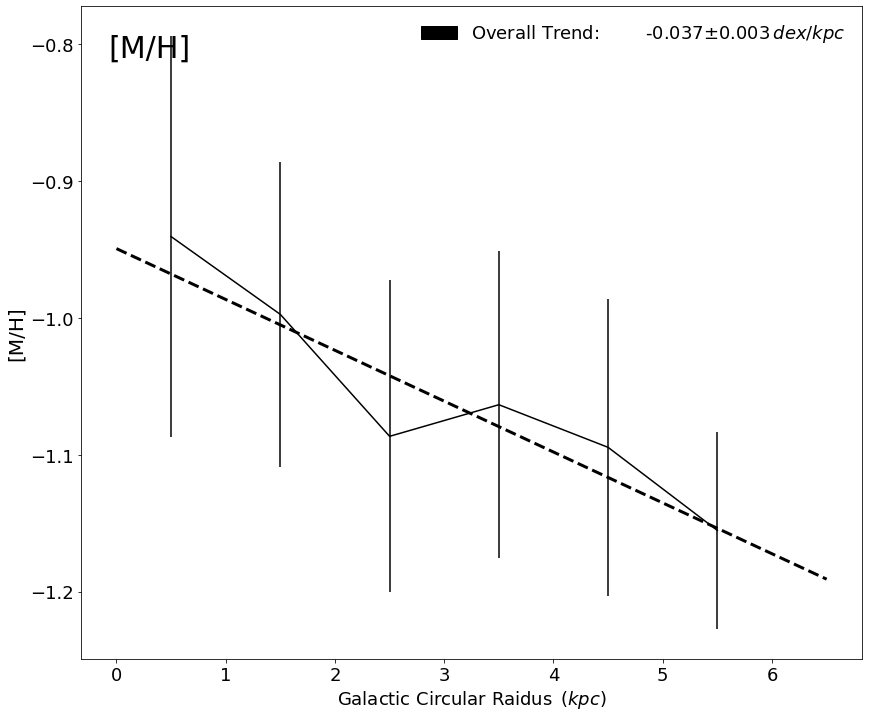

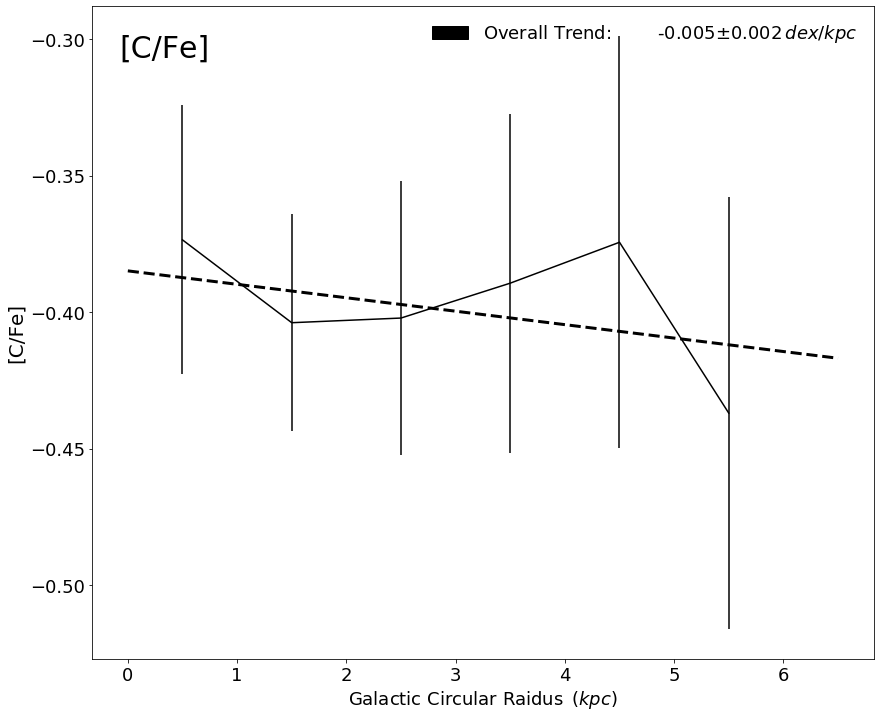

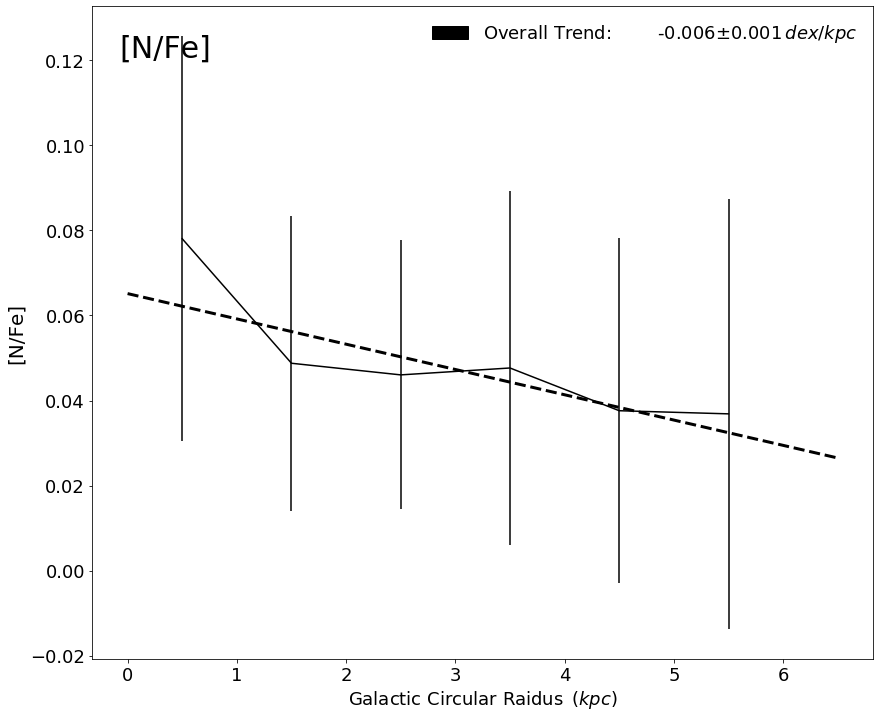

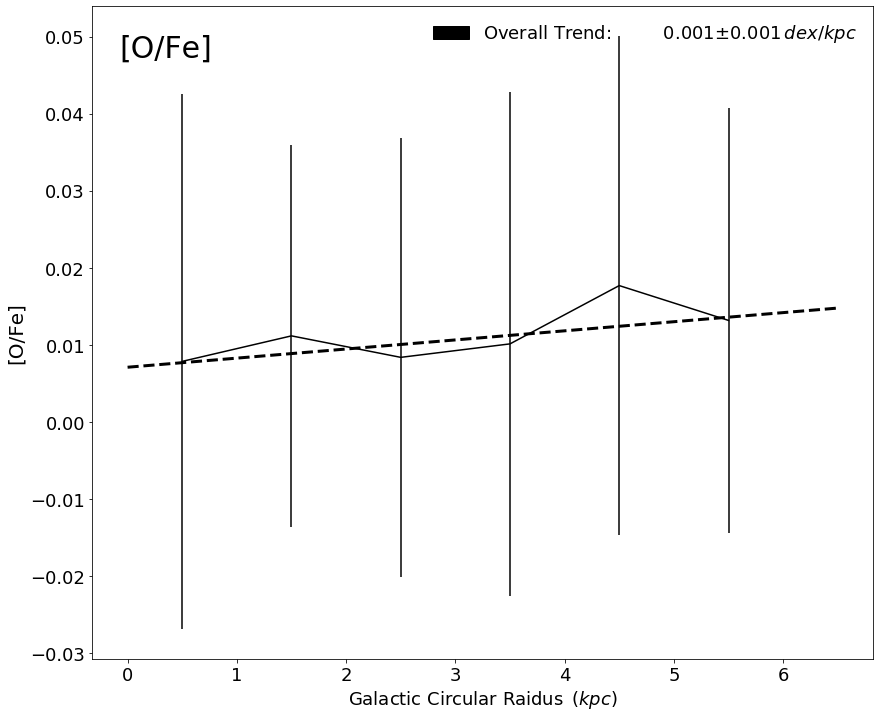

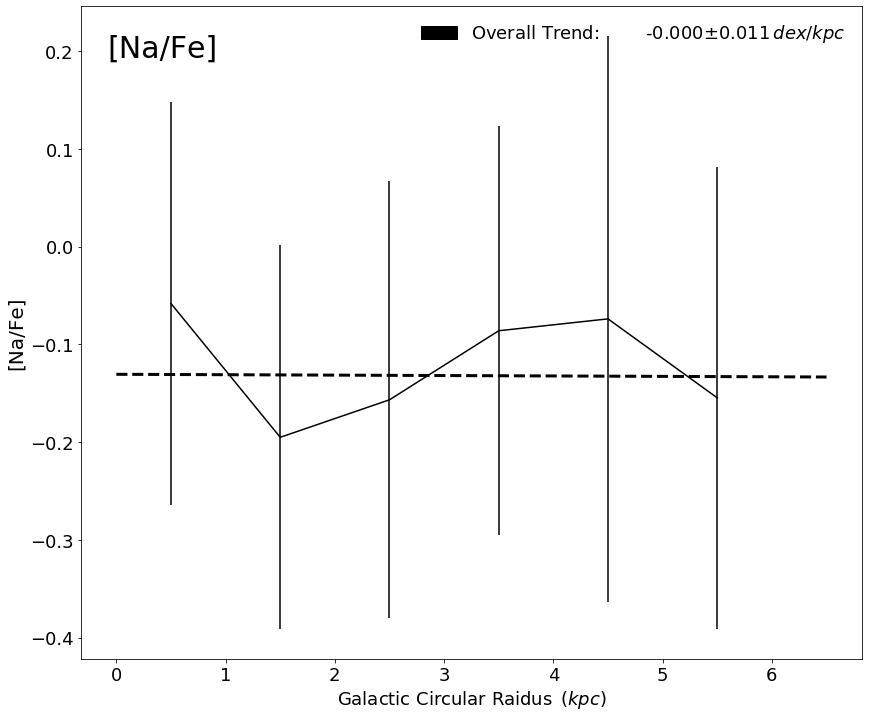

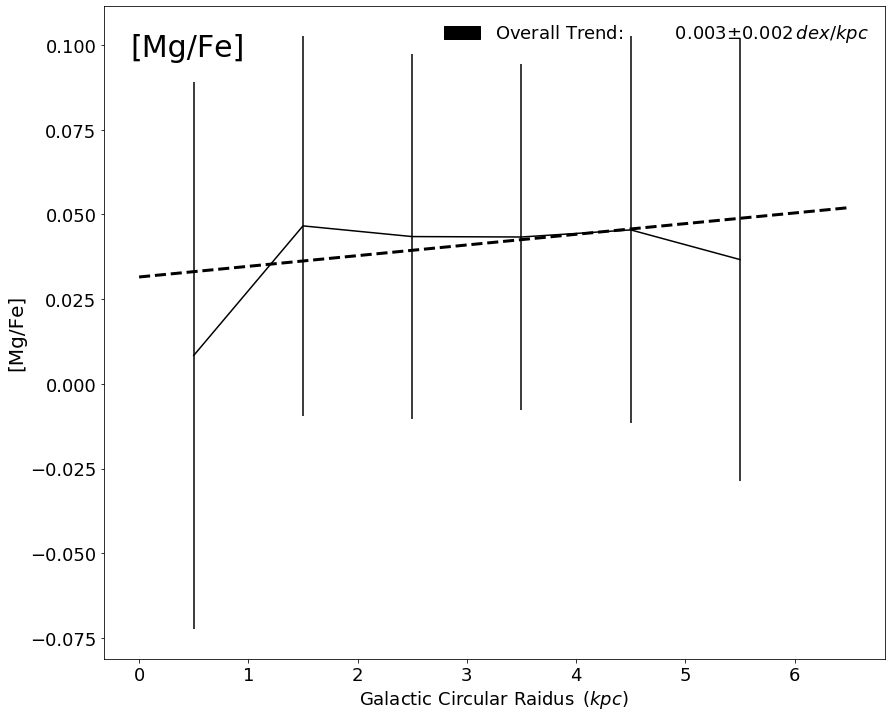

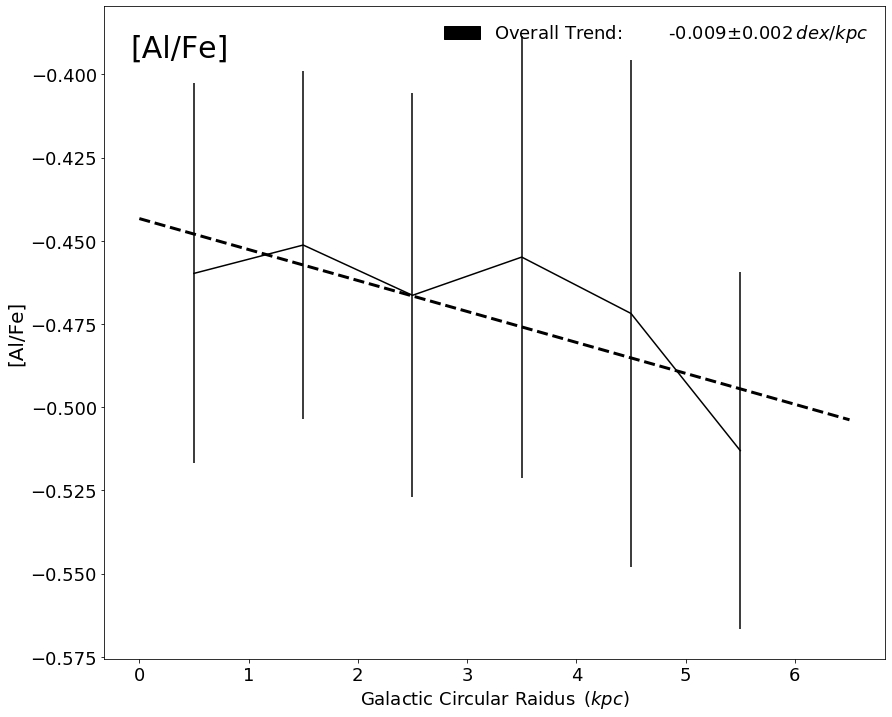

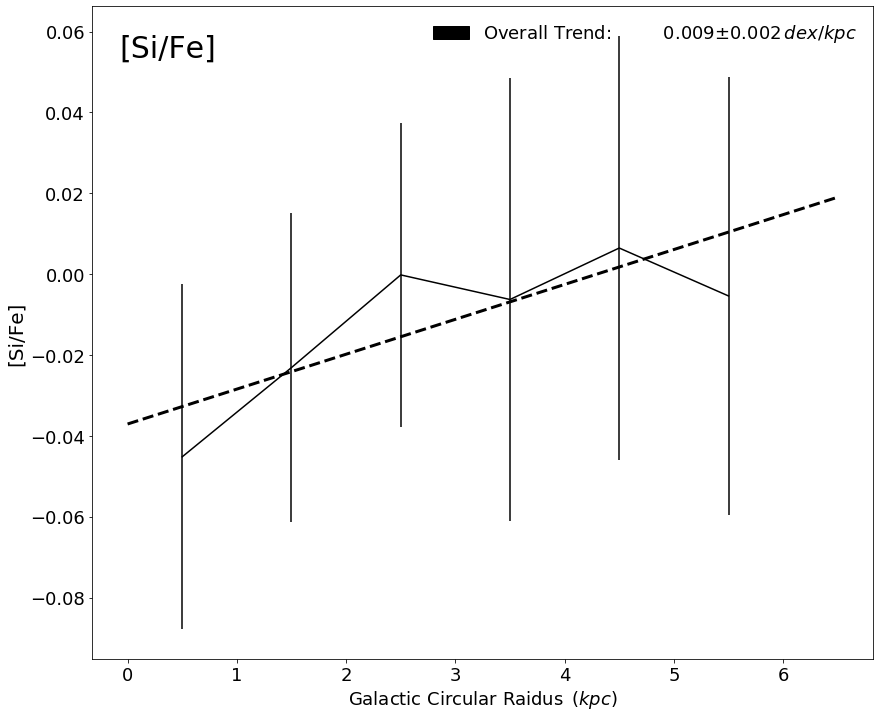

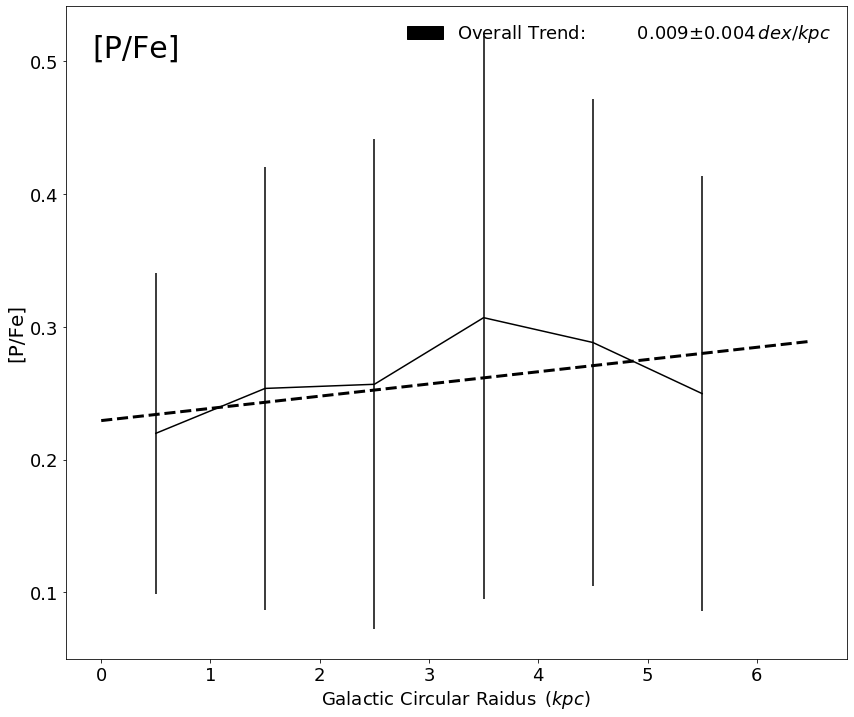

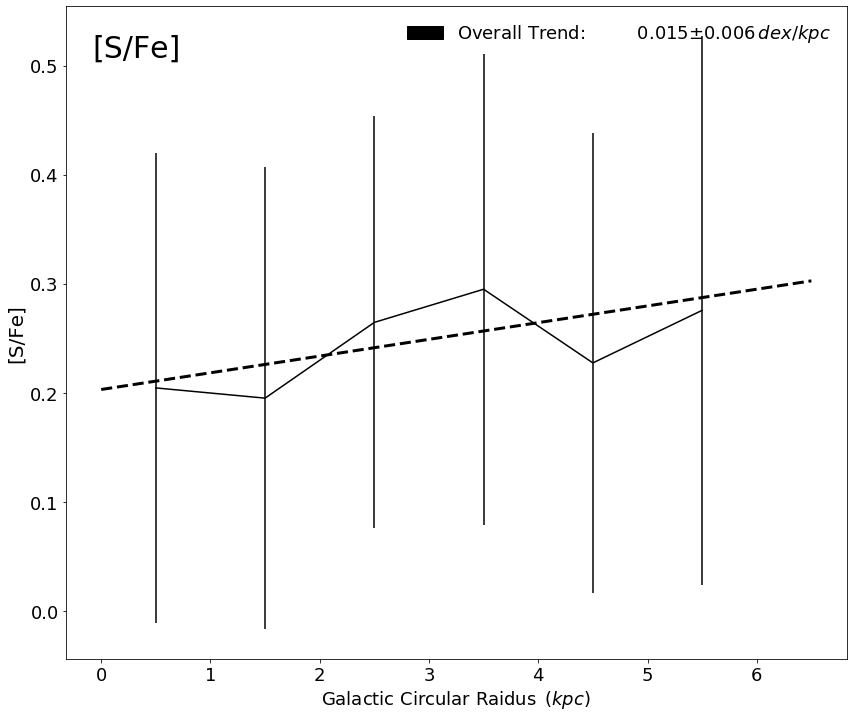

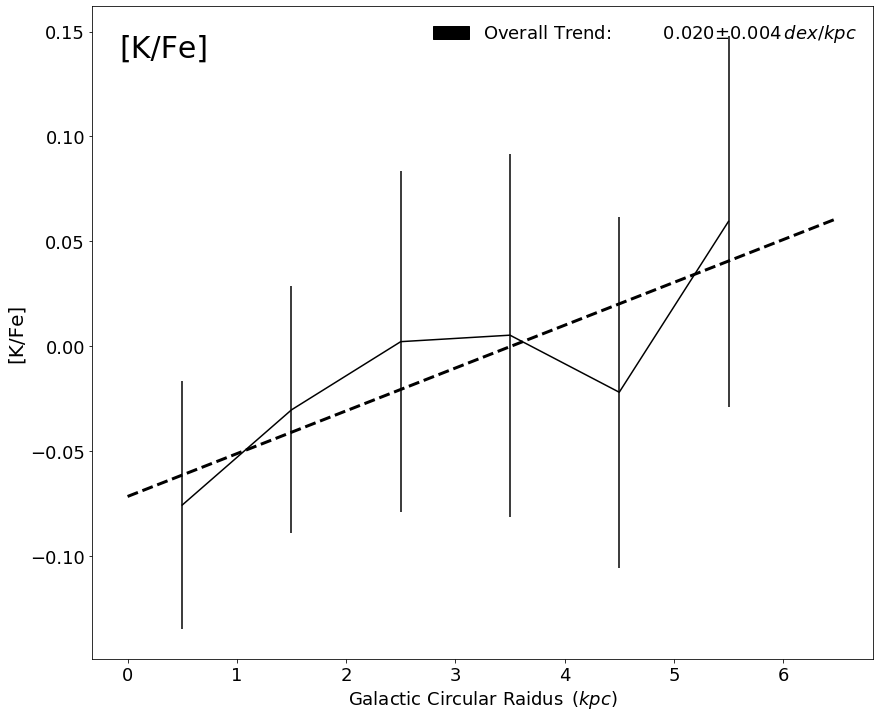

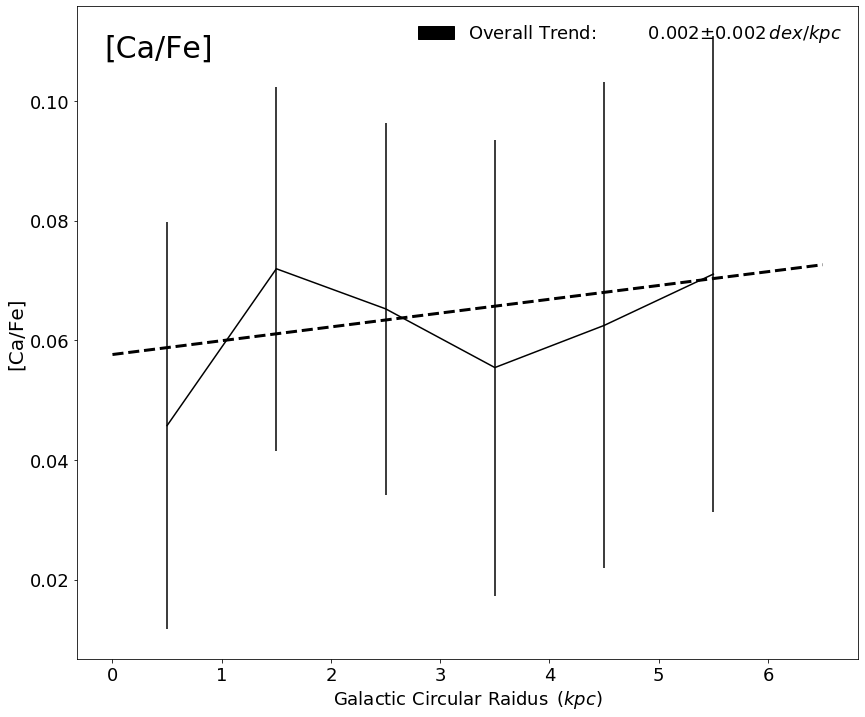

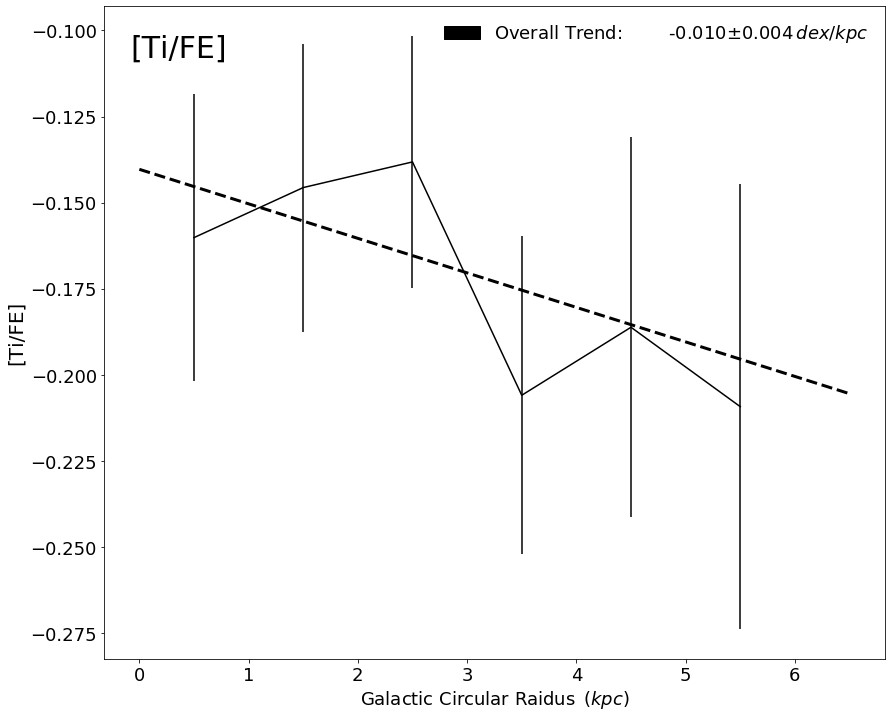

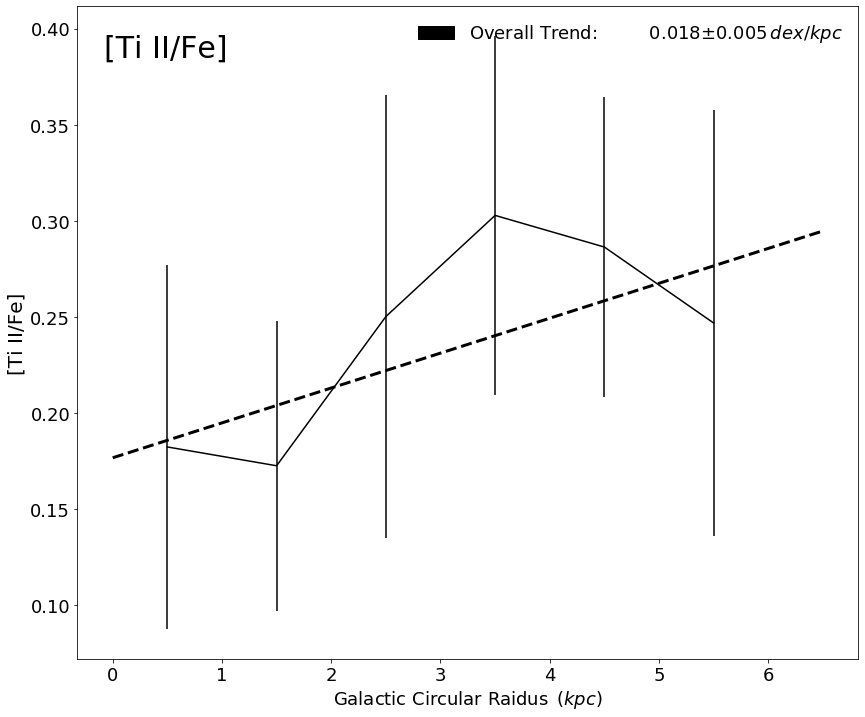

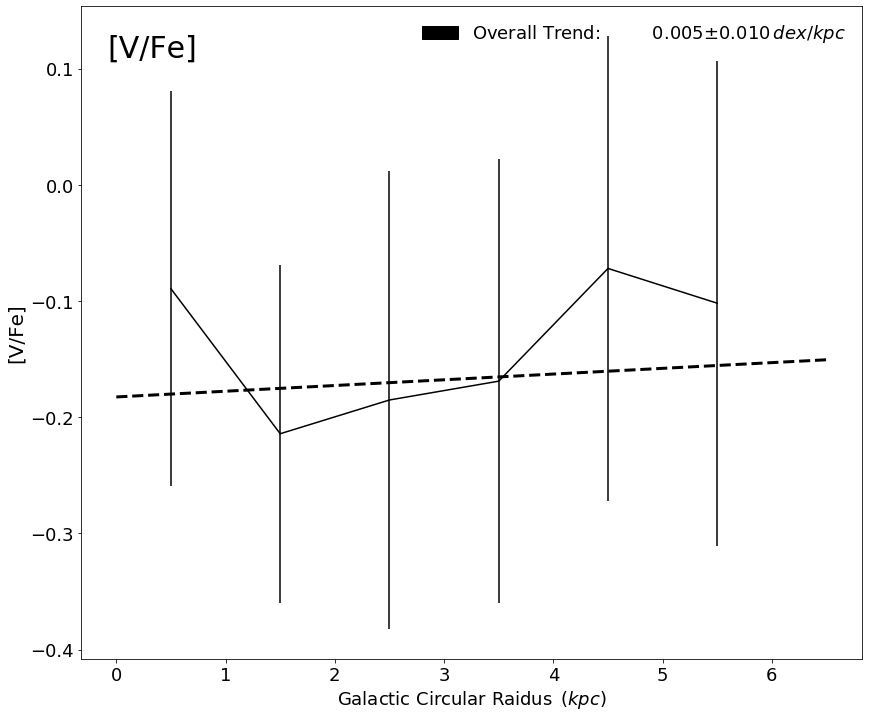

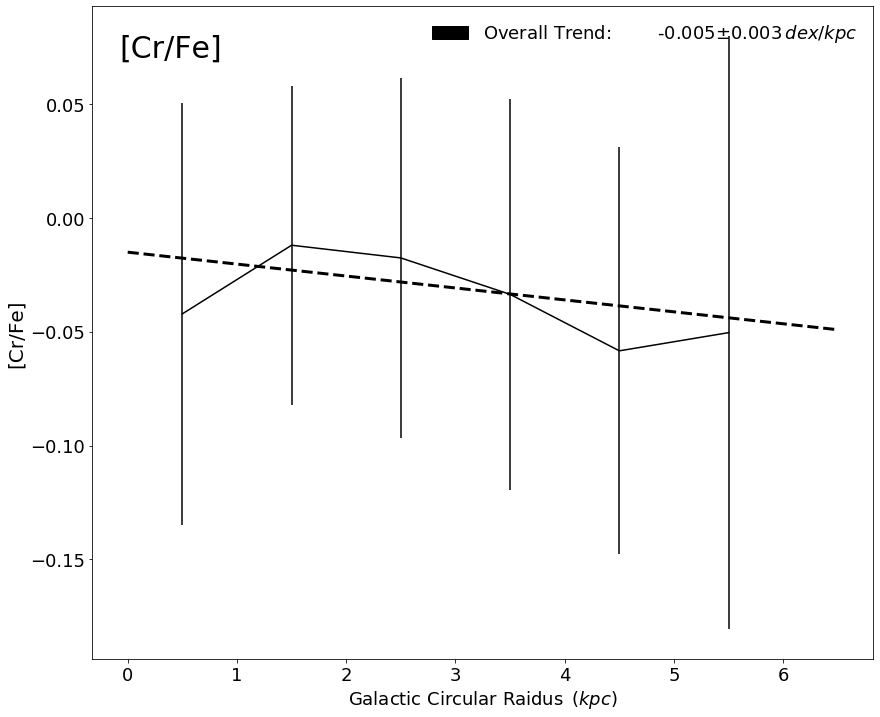

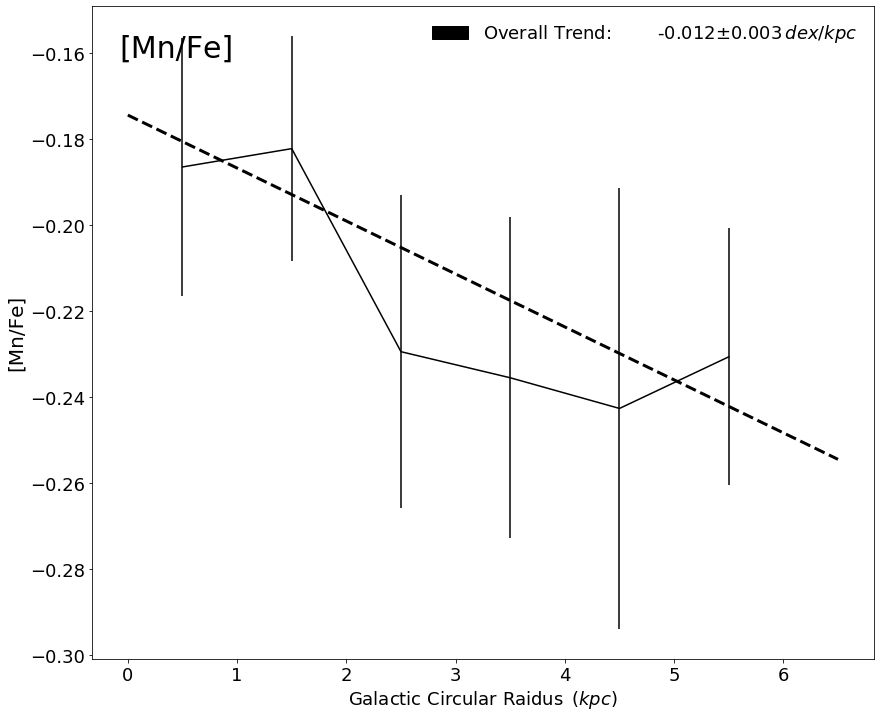

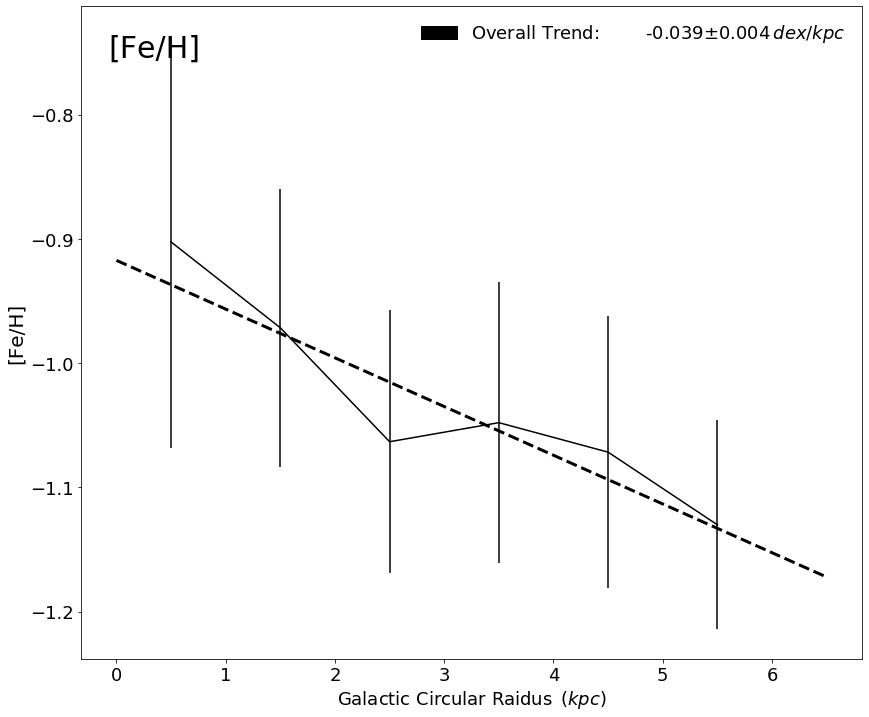

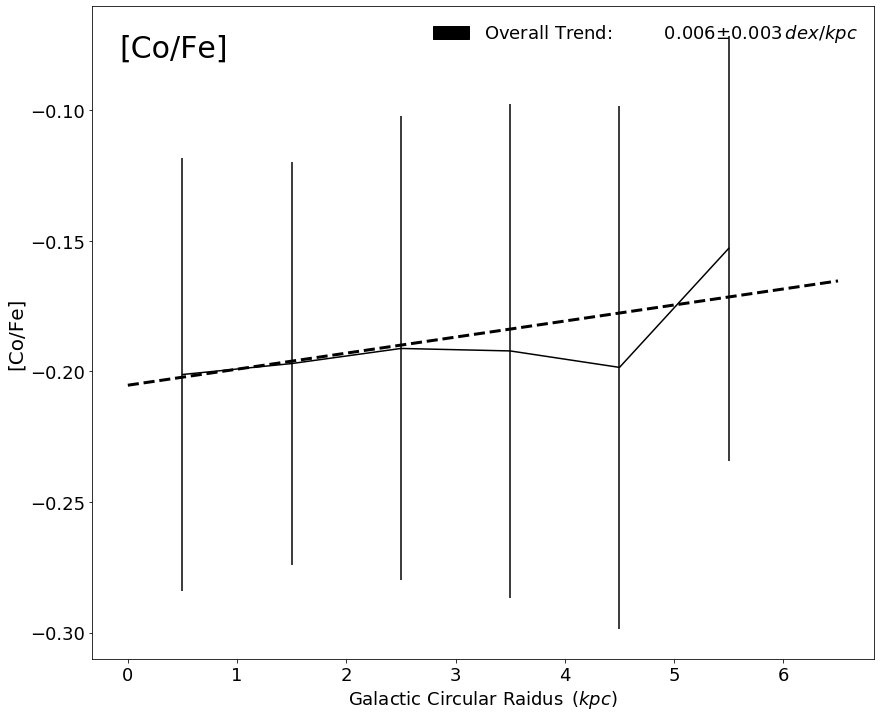

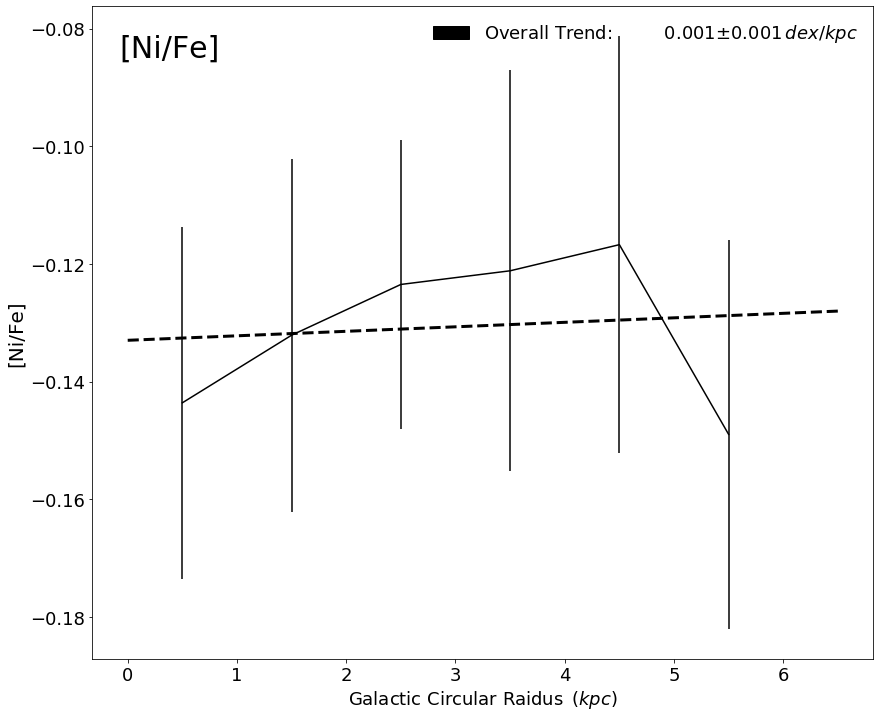

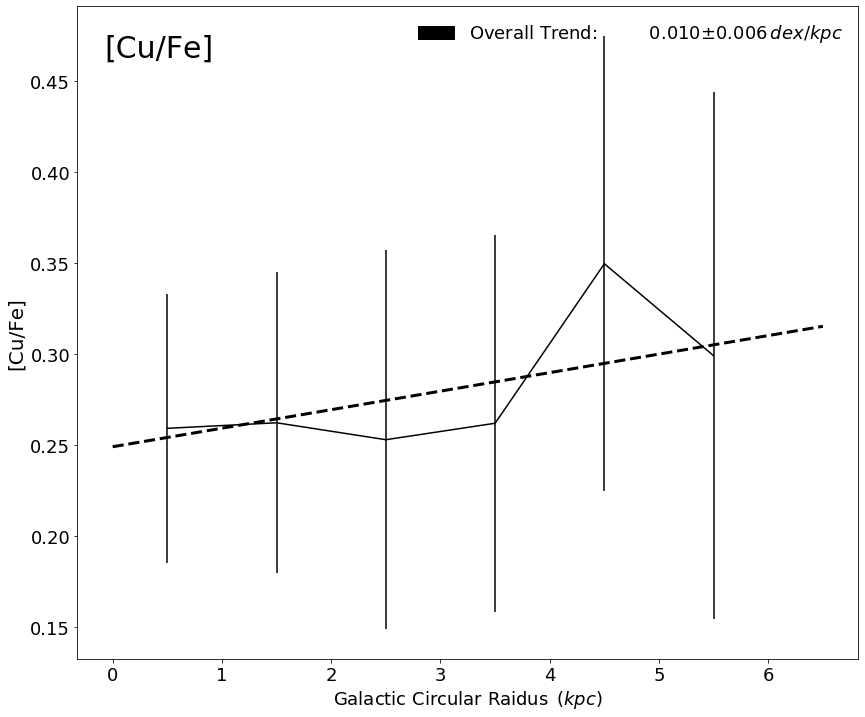

In [38]:
matplotlib.rcParams.update({'font.size': 18})

for i in tqdm_notebook(range(len(elems)-5),desc='plots',leave=False):
    
    cln = np.where(smc[elems[i]]>-100)
    
    xval = np.linspace(0.0,6.5)

    fig = plt.figure(figsize=[14,12])
    
    ###Overall Trend
    def trendline(x):
        return re_med_ms[i]*x+re_med_bs[i]
    
    plt.plot(xval,trendline(xval),c='k',lw=3.0,ls='--')
#     plt.scatter(np.asarray(radius)[cln],smc[elems[i]][cln],marker='+',c='tab:blue')
    plt.errorbar([0.5,1.5,2.5,3.5,4.5,5.5],over_stats[i],yerr=over_spread[i],c='k')
    
    handles,labels = plt.gca().get_legend_handles_labels()
    empty_over = mpatches.Patch(color='black',label='Overall Trend')
    handles.append(empty_over)

    labels.append('Overall Trend: {:>13.3f}$\pm {:.3f} \,dex/kpc$'.format(re_med_ms[i],med_m_devs[i]))
    
    plt.legend(handles,labels,loc='upper right',fontsize='medium',frameon=False)

    plt.ylabel(r'{}'.format(labs[i]),fontsize=20)
    plt.xlabel(r'Galactic Circular Raidus $\,(kpc$)')
    
#     plt.ylim(top = ytops[i])
    
    
    ax0 = fig.add_subplot(111)
    at0 = AnchoredText('{}'.format(labs[i]),prop=dict(size=30),frameon=False,loc='upper left')
    at0.patch.set_boxstyle("square")
    ax0.add_artist(at0)
    
#     plt.savefig('overallgradonly{}.pdf'.format(elems[i]),bbox_inches='tight')
    plt.show()

In [41]:
overalllmc = fits.getdata('/Users/joshpovick/Desktop/Research/LMC_Gradients_with_Ages/overallgrads.fits',0)

In [42]:
overalllmc.columns

ColDefs(
    name = 'X_FE'; format = '7A'
    name = 'GRAD'; format = 'D'
    name = 'GRAD_ERR'; format = 'D'
    name = 'INTER'; format = 'D'
    name = 'INTER_ERR'; format = 'D'
)

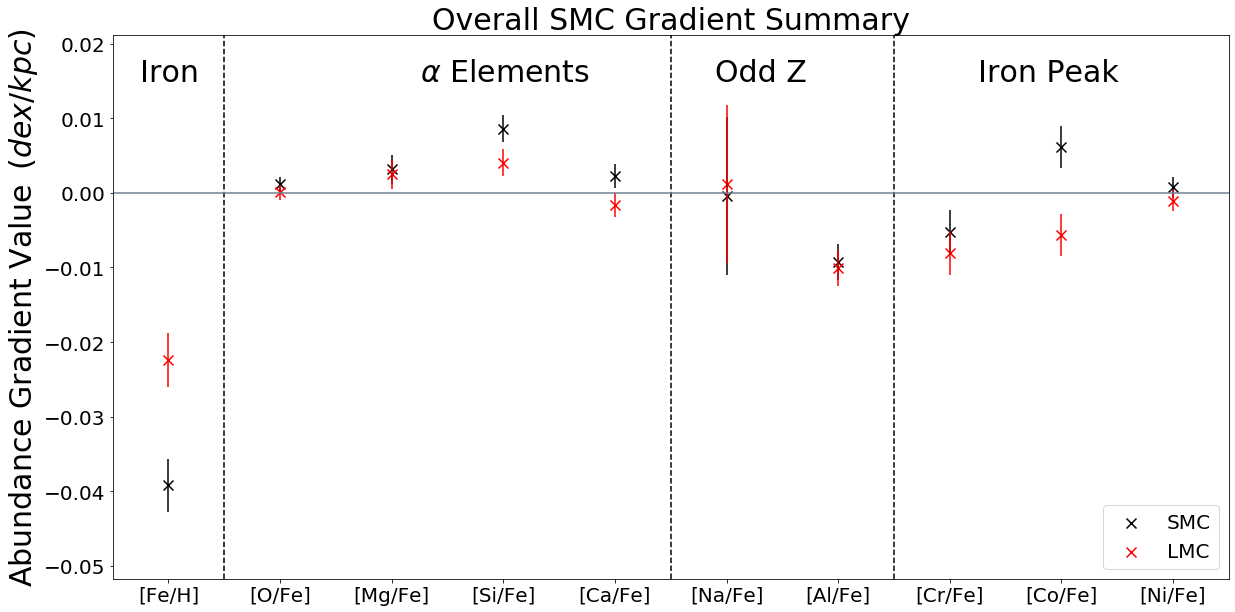

In [50]:
idx = [np.squeeze(np.where(np.asarray(elems)=='FE_H')),np.squeeze(np.where(np.asarray(elems)=='O_FE')),
       np.squeeze(np.where(np.asarray(elems)=='MG_FE')),np.squeeze(np.where(np.asarray(elems)=='SI_FE')),
       np.squeeze(np.where(np.asarray(elems)=='CA_FE')),np.squeeze(np.where(np.asarray(elems)=='NA_FE')),
       np.squeeze(np.where(np.asarray(elems)=='AL_FE')),np.squeeze(np.where(np.asarray(elems)=='CR_FE')),
       np.squeeze(np.where(np.asarray(elems)=='CO_FE')),np.squeeze(np.where(np.asarray(elems)=='NI_FE'))]

### SMC 
good_over = []
err_over = []

good_med = []
err_med = []

### LMC 
lgood_over = []
lerr_over = []

lgood_med = []
lerr_med = []

for i in idx:
    good_over.append(re_med_ms[i])
    err_over.append(med_m_devs[i])
    
    lgood_over.append(overalllmc['GRAD'][i])
    lerr_over.append(overalllmc['GRAD_ERR'][i])
    
#     good_med.append(med_m[i])

matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=[20,10])

plt.scatter([0,1,2,3,4,5,6,7,8,9],good_over,marker='x',c='black',label='SMC',s=100)
plt.errorbar([0,1,2,3,4,5,6,7,8,9],good_over,yerr=err_over,c='black',ls='none')

plt.scatter([0,1,2,3,4,5,6,7,8,9],lgood_over,marker='x',c='red',label='LMC',s=100)
plt.errorbar([0,1,2,3,4,5,6,7,8,9],lgood_over,yerr=err_over,c='red',ls='none')

plt.legend(loc='lower right')

#plt.scatter([0,1,2,3,4,5,6,7,8,9],good_med,marker='x',c='red',label='0.5 kpc bins',s=100)

xplotlab = ['[Fe/H]','[O/Fe]','[Mg/Fe]','[Si/Fe]','[Ca/Fe]','[Na/Fe]','[Al/Fe]','[Cr/Fe]','[Co/Fe]','[Ni/Fe]']
xplotpos = [0,1,2,3,4,5,6,7,8,9] 
plt.xticks(xplotpos,xplotlab)

plt.axvline(0.5,c='k',ls='--')
plt.axvline(4.5,c='k',ls='--')
plt.axvline(6.5,c='k',ls='--')
plt.axhline(0.0,c='slategrey',ls='-')
plt.ylabel('Abundance Gradient Value $\,(dex/kpc)$',fontsize=30)

# plt.gca().set_ylim(top=0.05)

plt.text(-0.25,0.015,'Iron',fontsize=30)
plt.text(2.25,0.015,'$\\alpha$ Elements',fontsize=30)
plt.text(4.9,0.015,'Odd Z',fontsize=30)
plt.text(7.25,0.015,'Iron Peak',fontsize=30)

plt.title(r'Overall SMC Gradient Summary',fontsize=30)

# plt.legend(loc='lower center',frameon=True,fancybox=False,fontsize='large')
# plt.savefig('mle_overall.pdf',bbox_inches='tight')
plt.show()

Text(0.5, 1.0, 'Color as Log(g)')

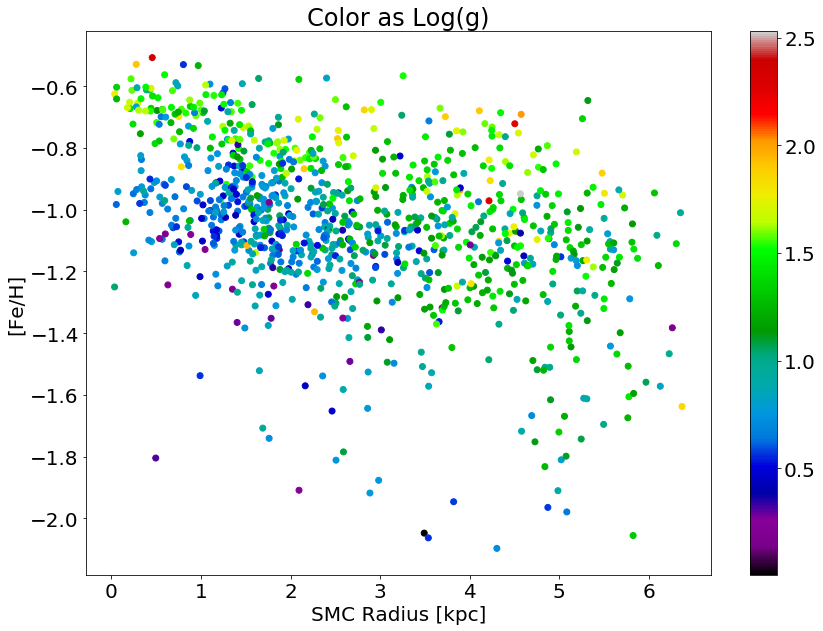

In [64]:
plt.figure(figsize=[14,10])
plt.scatter(smc['SMCRAD']*1.05,smc['FE_H'],c=smc['logg'],cmap='nipy_spectral')
plt.colorbar()

plt.xlabel(r'SMC Radius [kpc]')
plt.ylabel(r'[Fe/H]')
plt.title(r'Color as Log(g)')

In [53]:
smc['FE_H']

array([-1.0541615 , -1.3652616 , -0.92561156, -0.89167154, -0.85872155,
       -0.65319157, -0.9856315 , -0.73379153, -1.1825615 , -0.96879154,
       -1.0928615 , -0.6780816 , -1.0019616 , -1.2090615 , -0.94359154,
       -0.85525155, -0.86825156, -1.0690615 , -0.60832155, -0.65520155,
       -1.0237615 , -0.91265154, -0.97063154, -0.73021156, -0.8170416 ,
       -1.0795616 , -0.8596615 , -0.7139015 , -1.0688616 , -0.63019156,
       -1.0328616 , -1.1288615 , -1.0025616 , -0.81881154, -0.95022154,
       -0.62747157, -0.59330153, -1.5376616 , -0.6707116 , -0.6220015 ,
       -0.68286157, -0.96007156, -1.1017616 , -0.90573156, -0.95541155,
       -0.7722315 , -0.98695153, -0.79929155, -0.7246516 , -1.0844616 ,
       -0.92373157, -1.1177615 , -0.66534156, -0.7644616 , -0.6277915 ,
       -1.0575615 , -0.9073715 , -0.77057153, -0.84116155, -0.6860815 ,
       -0.72936153, -0.6769015 , -0.6586915 , -0.74333155, -0.77911156,
       -0.6955615 , -0.9845315 , -0.53019154, -0.68593156, -1.10

In [168]:
len(over_stats[0])

6

In [49]:
cln = np.where((smc[elems[3]]>-100)&(smc['SNR']>=100))
np.arange(np.floor(np.min(radius[cln])),np.ceil(np.max(radius[cln])),1.0)

array([0., 1., 2., 3., 4., 5., 6.])

In [2]:
###################
### Import Data ###
###################

from sklearn.model_selection import train_test_split

parsecall = ascii.read('parsec3_3.dat',format='basic', delimiter='\s')

rgb = np.where(parsecall['label']==3)
parsec = parsecall[rgb]

xs = np.array([parsec['logTe'],parsec['MH'],parsec['logg']]).T

X_train, X_test, y_train, y_test = train_test_split(xs, parsec['logAge'], train_size=0.20)

In [3]:
### Find all models

### fitting
import statsmodels.api as sm

### Model generation
import itertools as it

# linear terms
x1 = X_train[:,0]
x2 = X_train[:,1]
x3 = X_train[:,2]

# linear int
x12 = np.multiply(x1,x2)
x13 = np.multiply(x1,x3)
x23 = np.multiply(x2,x3)

# squares
x1sq = x1**2
x2sq = x2**2
x3sq = x3**2

# cubes
x1cu = x1**3
x2cu = x2**3
x3cu = x3**3


#find all possible models
models = []
models_str = []

all_var_str = ['x1','x2','x3','x12','x13','x23','x1sq','x2sq','x3sq','x1cu','x2cu','x3cu']
all_var = [x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x1cu,x2cu,x3cu]

for i in range(1,len(all_var)+1):
    for subset in it.combinations(all_var,i):
        models.append(subset)
    for subset_str in it.combinations(all_var_str,i):
        models_str.append(np.array(subset_str))
        
models = np.array(models)
models_str = np.array(models_str)

### Fit All Models

import statsmodels.api as sm 

all_params = []
summaries = []
max_resid = []
mads = []
resids = []
predict = []
llf = [] 
for i in tqdm_notebook(range(len(models)),desc='Done?'):
    pmodl = np.array(models[i]).T
    pmodl = sm.add_constant(pmodl)
    model = sm.OLS(y_train,pmodl).fit()
    summaries.append(model.summary())
    predictions = model.predict(pmodl)
    predict.append(predictions)
    residual = predictions - y_train
    resids.append(residual)
    all_params.append(np.asarray(model.params))
    max_resid.append(np.max(np.absolute(residual)))
    mads.append(util.mad(residual))
    llf.append(model.llf)

In [4]:
print('Min Mad: ', np.asarray(mads).argmin())
print('MAD: ', mads[np.asarray(mads).argmin()])
# print('Max Loglikelihood: ', np.asarray(llf).argmax())
# print('Max Residual: ', np.asarray(max_resid).argmin())
print(models_str[np.asarray(mads).argmin()])
print(summaries[np.asarray(mads).argmin()])

Min Mad:  4094
MAD:  0.08755335943523157
['x1' 'x2' 'x3' 'x12' 'x13' 'x23' 'x1sq' 'x2sq' 'x3sq' 'x1cu' 'x2cu'
 'x3cu']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     2639.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:41:20   Log-Likelihood:                 1493.2
No. Observations:                2989   AIC:                            -2960.
Df Residuals:                    2976   BIC:                            -2882.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

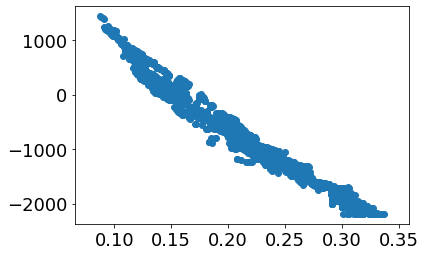

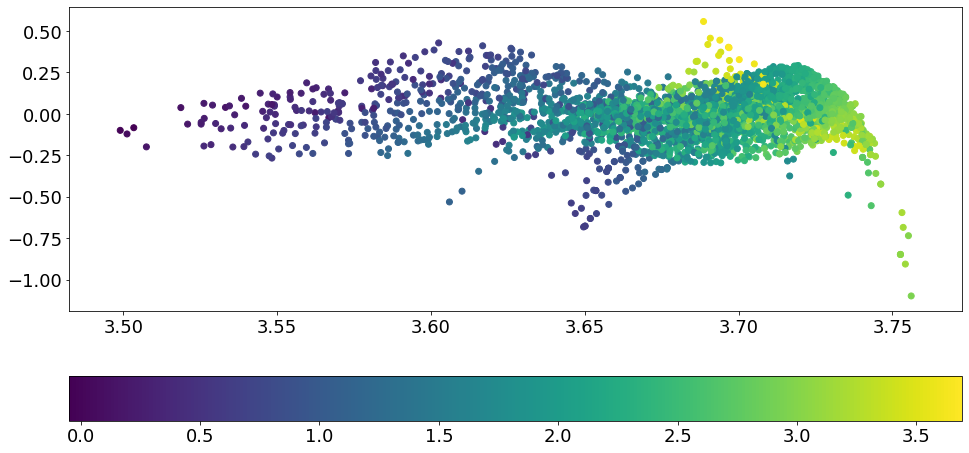

In [41]:
plt.scatter(mads,llf)
plt.show()

plt.figure(figsize=[16,8])
plt.scatter(x1,resids[np.asarray(mads).argmin()],c=x3)
plt.colorbar(orientation = 'horizontal')
plt.show()

In [31]:
len(x1)

2989

In [32]:
len(llf)

4095

In [19]:
### Find all models

### fitting
import statsmodels.api as sm

### Model generation
import itertools as it

# linear terms
y1 = parsec['MH']
y2 = 18.90*np.ones(len(parsec['MH']))

# linear int
y12 = np.multiply(y1,y2)

# squares
y1sq = y1**2
y2sq = y2**2

# squares and linear
y1sq2 = np.multiply(y1sq,y2)
y2sq1 = np.multiply(y2sq,y1)

# cubes
y1cu = y1**3
y2cu = y2**3

#cubes and linear


# cubes and squares


#find all possible models
ymodels = []
ymodels_str = []

all_var_str = ['y1','y2','y12','y1sq','y2sq','y1sq2','y2sq1','y1cu','y2cu']
all_var = [y1,y2,y12,y1sq,y2sq,y1sq2,y2sq1,y1cu,y2cu]

for i in range(1,len(all_var)+1):
    for subset in it.combinations(all_var,i):
        ymodels.append(subset)
    for subset_str in it.combinations(all_var_str,i):
        ymodels_str.append(np.array(subset_str))
        
ymodels = np.array(ymodels)
ymodels_str = np.array(ymodels_str)

### Fit All Models

import statsmodels.api as sm 

yall_params = []
ysummaries = []
ymax_resid = []
ymads = []
yresids = []
ypredict = []
yllf = [] 
for i in tqdm_notebook(range(len(models)),desc='Done?'):
    pmodl = np.array(models[i]).T
    pmodl = sm.add_constant(pmodl)
    model = sm.OLS(parsec['Ksmag'],pmodl).fit()
    ysummaries.append(model.summary())
    predictions = model.predict(pmodl)
    ypredict.append(predictions)
    yresidual = predictions - parsec['Ksmag']
    yresids.append(residual)
    yall_params.append(np.asarray(model.params))
    ymax_resid.append(np.max(np.absolute(residual)))
    ymads.append(util.mad(residual))
    yllf.append(model.llf)

In [26]:
print('Min Mad: ', np.asarray(ymads).argmin())
print('MAD: ', ymads[np.asarray(ymads).argmin()])
print('Max Loglikelihood: ', np.asarray(yllf).argmax())
print('Max Residual: ', np.asarray(ymax_resid).argmin())
# print(ymodels_str[np.asarray(ymads).argmin()])
# print(ysummaries[np.asarray(ymads).argmin()])

Min Mad:  0
MAD:  0.08755335943523157
Max Loglikelihood:  282
Max Residual:  0


In [30]:
print(ymodels_str[282])
print(yall_params[282])

['y1' 'y2' 'y2sq' 'y1sq2' 'y2cu']
[ 1.00000000e+00  3.28721682e-13 -1.36060795e-14 -5.28548559e-19
 -2.00278982e-16]


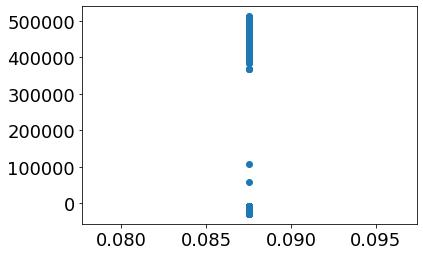

In [24]:
plt.scatter(ymads,yllf)

In [23]:
pmodl = np.array([parsec['MH']]).T
pmodl = sm.add_constant(pmodl)
model = sm.OLS(parsec['Ksmag'],pmodl).fit()
print(model.summary())
predictions = model.predict(pmodl)
yresidual = predictions - parsec['Ksmag']
print('params: ',np.asarray(model.params))
print('max resid: ',np.max(np.absolute(residual)))
print('mad resid: ',util.mad(residual))
print('logL: ',model.llf)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.641
Date:                Thu, 15 Oct 2020   Prob (F-statistic):             0.0312
Time:                        10:02:28   Log-Likelihood:                -29413.
No. Observations:               14946   AIC:                         5.883e+04
Df Residuals:                   14944   BIC:                         5.885e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8757      0.026   -112.752      0.0

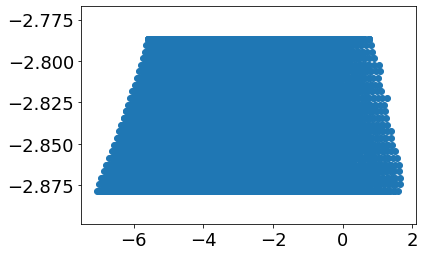

In [31]:
plt.scatter(parsec['Ksmag'],-0.04056809*parsec['MH']-np.ones_like(parsec['MH'])*2.87566963)

In [1]:
a = None

In [2]:
b = range(5)

In [6]:
[1.9,2.2,3.1,4.5]+0.0

TypeError: can only concatenate list (not "float") to list

In [25]:
from scipy.stats import binned_statistic_2d, binned_statistic
import numpy as np

In [17]:
x = [0.1, 0.1, 0.1, 0.6, 0.4, 0.5, 0.4, 0.2] #[0.1, 0.1, 0.1, 0.6]
y = [2.1, 2.6, 2.1, 2.1, 2.9, 2.3, 2.2, 2.5] #[2.1, 2.6, 2.1, 2.1]
binx = [0.0, 0.5, 1.0]
biny = [2.0, 2.5, 3.0]
ret = binned_statistic_2d(x, y, x, 'count', bins=[binx, biny])

In [11]:
ret.statistic

array([[2., 1.],
       [1., 0.]])

In [ ]:
statistic = lambda s: np.median(np.absolute(s - np.median(s)))

In [29]:
ret = binned_statistic(x, y, statistic = lambda s: np.median(np.absolute(s - np.median(s))), bins=binx)

In [30]:
ret.statistic

array([0.25, 0.1 ])

In [32]:
def mad(x):
    '''
    Calculate the Median Absolute Deviation (MAD) of s
    
    Input:
    -----
        s: values to calculate MAD of
    '''
    return np.median(np.absolute(x - np.median(x))) 

In [50]:
x = np.linspace(0,3.0,3000)
y = np.linspace(-0.5,0.5,3000)
bins = 

array([0.00000000e+00, 1.00033344e-03, 2.00066689e-03, ...,
       2.99799933e+00, 2.99899967e+00, 3.00000000e+00])

In [40]:
bin_stats, _, bin_ind = binned_statistic(x, y, statistic = 'median', bins = 2)
uniq = np.unique(bin_ind)
        
med_x_err = []
med_y_err = []
for i in range(len(uniq)):
    single_bin = np.where(bin_ind == uniq[i])
    med_x_err.append(mad(np.asarray(x)[single_bin]))
    med_y_err.append(mad(np.asarray(y)[single_bin]))

In [41]:
med_x_err

[0.0, 0.04999999999999999]

In [42]:
x

[0.1, 0.1, 0.1, 0.6, 0.4, 0.5, 0.4, 0.2]

In [43]:
y

[2.1, 2.6, 2.1, 2.1, 2.9, 2.3, 2.2, 2.5]

In [49]:
np.median([0.1,0.1,0.1,0.2]-np.median([0.1,0.1,0.1,0.2])*np.ones(4))

0.0

In [52]:
b = None

In [53]:
b

In [54]:
print(b)

None


In [57]:
if b == None:
    print('yes')

yes


In [6]:
smc.columns

ColDefs(
    name = 'APSTAR_ID'; format = '46A'
    name = 'TARGET_ID'; format = '36A'
    name = 'ASPCAP_ID'; format = '48A'
    name = 'FILE'; format = '34A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '6A'
    name = 'LOCATION_ID'; format = 'J'
    name = 'FIELD'; format = '5A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '45A'
    name = 'SURVEY'; format = '8A'
    name = 'PROGRAMNAME'; format = '10A'
    name 

(array([ 18.,  48.,  48., 104., 314., 235., 115.,  70.,  28.,  10.]),
 array([15.06324 , 15.282485, 15.501729, 15.720974, 15.940218, 16.159462,
        16.378708, 16.597952, 16.817196, 17.036442, 17.255686],
       dtype=float32),
 <a list of 1 Patch objects>)

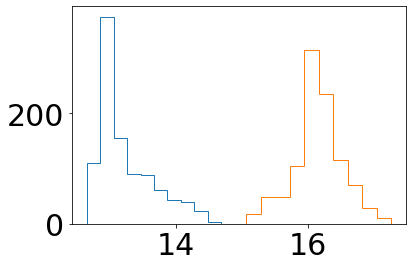

In [8]:
plt.hist(smc['K'],histtype='step')
plt.hist(smc['GAIA_PHOT_G_MEAN_MAG'],histtype='step')

(array([  8.,  18.,  45.,  87., 133., 158., 207., 209.,  98.,  27.]),
 array([ 76.65692 ,  79.02239 ,  81.38786 ,  83.753334,  86.118805,
         88.484276,  90.84975 ,  93.21522 ,  95.58069 ,  97.94616 ,
        100.31163 ], dtype=float32),
 <a list of 1 Patch objects>)

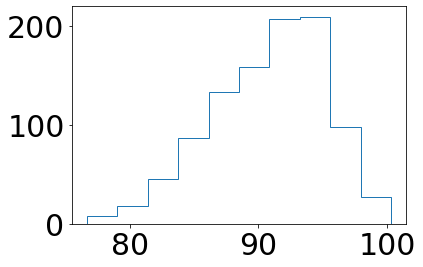

In [20]:
plt.hist(60.*10**((smc['J']-smc['K'])/5),histtype='step')